# **Status Prediction: Educational Institution**
- **Nama:** Muhammad Azhar Fikri
- **Email:** muhammadazharfikri990@gmail.com
- **ID Dicoding:** ririee

## **Persiapan**

**Persiapan** adalah tahap awal memenuhi kebutuhan teknis seperti menyiapkan library yang diperlukan dan memuat dataset yang akan digunakan.

### **Menyiapkan library yang dibutuhkan**

In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.compose import ColumnTransformer
from scipy.stats import chi2_contingency, pearsonr, f_oneway
from sklearn.feature_selection import RFE, SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

from google.colab import userdata
from sqlalchemy import create_engine

### **Menyiapkan data yang akan digunakan**

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv",
    delimiter=';'
    )

In [3]:
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## **Data Understanding**

**Data Understanding** adalah proses mengenal dan memahami karakteristik data yang akan digunakan.

Dataset ini berisi informasi demografis, latar belakang pendidikan, performa akademik, dan kondisi finansial mahasiswa. Tujuan utama dari analisis ini adalah memprediksi `Status` mahasiswa: **Dropout**, **Enrolled**, atau **Graduate**.

&nbsp;

- **Data Demografis & Sosial**
  - `Marital_status`: Status pernikahan mahasiswa.
  - `Nacionality`: Kebangsaan mahasiswa.
  - `Gender`: Jenis kelamin mahasiswa.
  - `Age_at_enrollment`: Usia mahasiswa saat mendaftar.
  - `Displaced`: Apakah mahasiswa merupakan pengungsi atau terkena relokasi.
  - `Educational_special_needs`: Apakah mahasiswa memiliki kebutuhan pendidikan khusus.
  - `International`: Apakah mahasiswa berasal dari luar negeri.

&nbsp;

- **Data Latar Belakang Pendidikan & Aplikasi**
  - `Application_mode`: Jalur atau mode pendaftaran (Tahap **1**, Tahap **2**, dsb).
  - `Application_order`: Urutan pilihan saat mendaftar.
  - `Course`: Program studi yang dipilih.
  - `Daytime_evening_attendance`: Waktu kehadiran kuliah (**siang**/**malam**).
  - `Previous_qualification`: Jenis kualifikasi pendidikan sebelumnya.
  - `Previous_qualification_grade`: Nilai dari kualifikasi sebelumnya.
  - `Mothers_qualification`: Kualifikasi pendidikan **ibu**.
  - `Fathers_qualification`: Kualifikasi pendidikan **ayah**.
  - `Mothers_occupation`: Jenis pekerjaan **ibu**.
  - `Fathers_occupation`: Jenis pekerjaan **ayah**.
  - `Admission_grade`: Nilai ujian masuk ke institusi pendidikan.

&nbsp;

- **Data Kinerja Akademik - Semester 1**
  - `Curricular_units_1st_sem_credited`: Jumlah unit yang dikreditkan.
  - `Curricular_units_1st_sem_enrolled`: Jumlah unit yang diambil.
  - `Curricular_units_1st_sem_evaluations`: Jumlah evaluasi yang dilakukan.
  - `Curricular_units_1st_sem_approved`: Jumlah unit yang lulus.
  - `Curricular_units_1st_sem_grade`: Nilai rata-rata semester **1**.
  - `Curricular_units_1st_sem_without_evaluations`: Unit yang tidak dievaluasi.

- **Data Kinerja Akademik - Semester 2**
  - `Curricular_units_2nd_sem_credited`: Jumlah unit yang dikreditkan.
  - `Curricular_units_2nd_sem_enrolled`: Jumlah unit yang diambil.
  - `Curricular_units_2nd_sem_evaluations`: Jumlah evaluasi yang dilakukan.
  - `Curricular_units_2nd_sem_approved`: Jumlah unit yang lulus.
  - `Curricular_units_2nd_sem_grade`: Nilai rata-rata semester **2**.
  - `Curricular_units_2nd_sem_without_evaluations`: Unit yang tidak dievaluasi.

  - `Scholarship_holder`: Apakah mahasiswa menerima beasiswa.

&nbsp;

- **Data Kondisi Ekonomi & Finansial**
  - `Debtor`: Apakah mahasiswa memiliki hutang terhadap institusi.
  - `Tuition_fees_up_to_date`: Apakah pembayaran kuliah sudah dilakukan tepat waktu.
  - `Unemployment_rate`: Tingkat pengangguran.
  - `Inflation_rate`: Tingkat inflasi ekonomi.
  - `GDP`: Produk Domestik Bruto (indikator pertumbuhan ekonomi).

&nbsp;

- **Variabel Target**
  - `Status`: Status akhir mahasiswa:
    - **Graduate**: Mahasiswa telah lulus.
    - **Dropout**: Mahasiswa keluar sebelum lulus.
    - **Enrolled**: Mahasiswa masih aktif terdaftar.


In [4]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

`df.columns`:

- Dataset ini terdiri dari **beragam fitur** yang mencerminkan:
  - **Data Demografis & Sosial** (`Gender`, `Age_at_enrollment`, `Marital_status`, dll.)
  - **Latar Belakang Pendidikan & Aplikasi** (`Course`, `Application_mode`, `Admission_grade`, dll.)
  - **Kinerja Akademik Mahasiswa** pada semester pertama dan kedua (`Curricular_units_1st_sem_*`, `Curricular_units_2nd_sem_*`)
  - **Kondisi Finansial & Ekonomi** (`Debtor`, `Tuition_fees_up_to_date`, `Unemployment_rate`, dll.)

- Fitur-fitur ini memberikan **gambaran menyeluruh** tentang karakteristik mahasiswa dan faktor-faktor yang mungkin memengaruhi keberhasilan studi mereka.

- Keberagaman fitur juga membuka kemungkinan eksplorasi dan pengembangan **model prediksi yang komprehensif** untuk klasifikasi `Status` mahasiswa.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

`df.info`:

- **Jumlah Entri**: Dataset ini memiliki total **4424** entri (baris data), yang menunjukkan jumlah observasi mahasiswa dalam analisis ini.

- **Tidak Ada Missing Values**: Semua **37 kolom** memiliki **4424 nilai non-null**, yang berarti **tidak terdapat nilai hilang (missing values)** di dataset ini. Ini merupakan kondisi yang ideal karena tidak diperlukan penanganan nilai yang hilang pada preprocessing.

- **Tipe Data**:
  - **29 kolom bertipe `int64`**: Kolom-kolom ini kemungkinan besar merepresentasikan data kategorikal yang telah di-encode ke bentuk numerik, seperti `Gender`, `Course`, atau `Marital_status`.
  - **7 kolom bertipe `float64`**: Kolom-kolom ini mewakili data numerik kontinu seperti `Admission_grade`, `Previous_qualification_grade`, `Curricular_units_1st_sem_grade`, dan indikator ekonomi seperti `GDP`, `Inflation_rate`, dan `Unemployment_rate`.
  - **1 kolom bertipe `object`**, yaitu `Status`: Kolom ini merupakan **variabel target** yang akan diprediksi, dengan nilai kategorikal berupa **Dropout**, **Enrolled**, atau **Graduate**.

In [6]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


`df.describe`:

- **Rentang Nilai**
  - `Previous_qualification_grade` memiliki rentang antara **95.00** hingga **190.00**, menunjukkan nilai akademik dari kualifikasi sebelumnya.
  - `Course` memiliki nilai dari **33** hingga **9991**, kemungkinan besar merupakan kode identifikasi untuk program studi.
  - `Curricular_units_1st_sem_grade` dan `Curricular_units_2nd_sem_grade` memiliki rentang **0.00** hingga sekitar **18.57**, menunjukkan skala penilaian akademik yang digunakan.
  - `Unemployment_rate`, `Inflation_rate`, dan `GDP` menunjukkan data ekonomi makro yang memiliki rentang:
    - `Unemployment_rate`: **7.6 – 16.2**
    - `Inflation_rate`: **-0.8 – 3.7**
    - `GDP`: **-4.06 – 3.51**

- **Rata-rata dan Standar Deviasi**
  - `Curricular_units_2nd_sem_grade` memiliki rata-rata sekitar **10.23** dengan standar deviasi **5.21**, mengindikasikan adanya variasi yang cukup tinggi dalam nilai mahasiswa pada semester kedua.
  - `Previous_qualification_grade` memiliki rata-rata **132.61** dengan deviasi **13.19**, yang cukup konsisten antar siswa.
  - `Application_mode` memiliki deviasi standar yang cukup tinggi (**17.48**) dibandingkan dengan rata-ratanya (**18.67**), menunjukkan keberagaman signifikan dalam cara mahasiswa mendaftar.

- **Kuartil dan Distribusi**
  - Kuartil (25%, 50%, 75%) memberikan gambaran distribusi data, misalnya:
    - `Curricular_units_2nd_sem_enrolled`: Median (50%) adalah **6**, dengan kuartil bawah **5** dan kuartil atas **7**, menunjukkan sebagian besar mahasiswa mengambil 5–7 mata kuliah di semester 2.
    - `Application_order` mayoritas berada di urutan **1–2**, artinya sebagian besar mahasiswa diterima di pilihan utama mereka.

- **Outliers**
  - `Curricular_units_1st_sem_without_evaluations` dan `Curricular_units_2nd_sem_without_evaluations` memiliki rata-rata sangat rendah (~**0.13–0.15**) namun nilai maksimum hingga **12**, menunjukkan kemungkinan adanya **outliers** (mahasiswa yang tidak menyelesaikan banyak evaluasi).
  - `Previous_qualification` memiliki nilai maksimum hingga **43**, jauh di atas median **1**, juga bisa menjadi indikasi **outlier kategori**.

- **Kesimpulan Awal**
  - Data memiliki variasi yang baik dari sisi akademik, sosial, dan ekonomi.
  - Terdapat indikasi keberadaan outliers yang perlu diperhatikan dalam preprocessing.
  - Distribusi data pada beberapa fitur bersifat skewed, yang bisa memengaruhi performa model.

## **Data Preparation / Preprocessing**

**Data Preparation / Preprocessing** adalah proses membersihkan dan mengubah data mentah menjadi bentuk yang lebih siap digunakan.

### **Penanganan Data Yang Hilang, Duplikasi Data & Pembagian Variabel Target**

In [7]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [8]:
df.duplicated().sum()

np.int64(0)

Hasil pengecekan dengan `df.isna().sum()`, tidak terdapat nilai yang hilang (missing values) di seluruh kolom dataset, sehingga tidak diperlukan proses imputasi atau pengisian data. Selain itu, hasil dari `df.duplicated().sum()` menunjukkan bahwa tidak ada baris data yang duplikat, sehingga dataset ini sudah bersih dari pengulangan data.


In [9]:
stat_count = df.Status.value_counts()
stat_percent = (stat_count / len(df)) * 100
stat_summary = stat_count.astype(str) + ' (' + stat_percent.apply(lambda x: f"{x:.2f}%") + ')'

print(stat_summary)

Status
Graduate    2209 (49.93%)
Dropout     1421 (32.12%)
Enrolled     794 (17.95%)
Name: count, dtype: object


`df.Status.value_counts()`:

Dari hasil `value_counts()` pada kolom `Status`, distribusi mahasiswa berdasarkan status akademik adalah sebagai berikut:

&nbsp;

| Status     | Mahasiswa | Persentase (%) |
|------------|-----------|----------------|
| Graduate   | 2.209     | 49.93%         |
| Dropout    | 1.421     | 32.13%         |
| Enrolled   | 794       | 17.95%         |
| **Total**  | **4.424** | 100%           |

&nbsp;

**Kesimpulan**: Dataset ini menunjukkan **ketidakseimbangan kelas (imbalanced dataset)**. Kelas `Graduate` mendominasi jumlah entri, diikuti oleh `Dropout`, sedangkan `Enrolled` memiliki jumlah paling sedikit. Imbalance ini perlu diperhatikan dalam pemodelan agar model tidak bias terhadap kelas mayoritas.
- `Graduate` **(Lulus)**: Mahasiswa yang telah menyelesaikan studinya terdapat sebanyak **2.209 mahasiswa (49.94%)**.
- `Dropout` **(Mengundurkan diri / Putus Studi)**: Mahasiswa yang tercatat tidak menyelesaikan studinya sebanyak **1.421 mahasiswa (32.13%)**.
- `Enrolled` **(Masih Terdaftar)**: Mahasiswa yang masih aktif dalam status terdaftar saat data diambil sebanyak **794 mahasiswa (17.94%)**, yang berarti status akhirnya belum diketahui.




In [10]:
pd.set_option('future.no_silent_downcasting', True)

df['Status_pred'] = df['Status'].replace({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 1
}).astype(int)

`replace()` digunakan untuk mengubah nilai kategori teks pada kolom `Status` menjadi representasi numerik biner, di mana status `Dropout` **diberi nilai 0**, dan `Enrolled` serta `Graduate` **diberi nilai 1**.

In [11]:
pred_count = df.Status_pred.value_counts()
pred_percent = (pred_count / len(df)) * 100
pred_summary = pred_count.astype(str) + ' (' + pred_percent.apply(lambda x: f"{x:.2f}%") + ')'

print(pred_summary)

Status_pred
1    3003 (67.88%)
0    1421 (32.12%)
Name: count, dtype: object


`df.Status_pred.value_counts()`:

Dari hasil `value_counts()` pada kolom `Status_pred` yang merupakan versi biner dari `Status`, distribusi mahasiswa terbagi menjadi dua kelompok sebagai berikut:

&nbsp;

| Status_pred | Keterangan          | Mahasiswa       | Persentase (%)   |
|-------------|---------------------|-----------------|------------------|
| 1           | Enrolled & Graduate | 3.003           | 67.88%           |
| 0           | Dropout             | 1.421           | 32.12%           |
| **Total**   |                     | **4.424**       | 100%             |

&nbsp;

**Kesimpulan**: Setelah pengelompokan menjadi kelas biner, data tetap menunjukkan ketidakseimbangan kelas dengan kelompok `1` **(Non-Dropout)** mendominasi sebanyak 67.88%, sedangkan kelompok `0` **(Dropout)** hanya sebesar 32.12%. Imbalance ini perlu diperhatikan dalam pemodelan agar model tidak bias terhadap kelas mayoritas.

- Kelompok `1` **(Non-Dropout)**: Mahasiswa yang masih terdaftar maupun yang sudah lulus, totalnya mencapai 3.003 mahasiswa (67.88%).
- Kelompok `0` **(Dropout)**: Mahasiswa yang putus studi, berjumlah 1.421 mahasiswa (32.12%).

### **Transformasi Data**

In [12]:
def decoding_cat(df, feature):
    cat_map = {
        'Marital_status': {
            1: 'Single',
            2: 'Married',
            3: 'Widower',
            4: 'Divorced',
            5: 'Facto Union',
            6: 'Legally Seperated'
        },
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Daytime_evening_attendance': {
            0: 'Evening',
            1: 'Daytime'
        },
        'Nacionality': {
            1: 'Portuguese',
            2: 'German',
            6: 'Spanish',
            11: 'Italian',
            13: 'Dutch',
            14: 'English',
            17: 'Lithuanian',
            21: 'Angolan',
            22: 'Cape Verdean',
            24: 'Guinean',
            25: 'Mozambican',
            26: 'Santomean',
            32: 'Turkish',
            41: 'Brazilian',
            62: 'Romanian',
            100: 'Moldova (Republic of)',
            101: 'Mexican',
            103: 'Ukrainian',
            105: 'Russian',
            108: 'Cuban',
            109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        },
        'Gender': {
            0: 'Female',
            1: 'Male'}
    }

    cat_map['Previous_qualification'] = cat_map['Qualification']
    cat_map['Mothers_qualification'] = cat_map['Qualification']
    cat_map['Fathers_qualification'] = cat_map['Qualification']

    cat_map['Mothers_occupation'] = cat_map['Occupation']
    cat_map['Fathers_occupation'] = cat_map['Occupation']

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in cat_map:
            df[f] = df[f].map(cat_map[f])

    return df

`def decoding_cat(df, feature)`:

`decoding_cat` mempermudah interpretasi data kategorikal yang direpresentasikan sebagai kode numerik dalam dataset. Tujuan utama dari fungsi ini adalah **mengubah nilai numerik menjadi label kategori yang dapat dibaca manusia** untuk meningkatkan pemahaman terhadap data. Dengan menerapkan fungsi ini, analisis eksploratif maupun visualisasi data menjadi **lebih intuitif dan mudah dipahami**, terutama saat menjelaskan pola atau distribusi dari kategori dalam data pada dashboard.

&nbsp;

Fungsi ini bekerja melalui beberapa tahap berikut:

- **Mendefinisikan Pemetaan Kategori**:
   - Fungsi menyimpan berbagai dictionary (`cat_map`) yang berisi **pemetaan antara nilai numerik dengan label kategorikal** yang relevan untuk masing-masing kolom, seperti:
     - `Marital_status`, `Application_mode`, `Course`, `Gender`, `Nacionality`
     - `Qualification` dan `Occupation`, yang juga digunakan kembali untuk kolom seperti:
       - `Previous_qualification`, `Mothers_qualification`, `Fathers_qualification`
       - `Mothers_occupation`, `Fathers_occupation`

- **Pemetaan Kolom**:
   - Fungsi menerima satu atau beberapa nama kolom (`feature`) sebagai argumen input.
   - Jika input berupa string tunggal, fungsi mengonversinya menjadi list agar dapat diproses secara konsisten.
   - Untuk setiap kolom yang terdapat dalam `cat_map`, fungsi akan menggantikan nilai numerik dengan label kategorikal menggunakan `.map()` dari Pandas.

- **Penggunaan Ulang Definisi**:
   - Untuk menjaga konsistensi dan efisiensi, beberapa kolom yang memiliki makna atau kategori yang sama (misalnya `Mothers_qualification`, `Fathers_qualification` dengan `Qualification`) **diarahkan ke dictionary pemetaan yang sama**.



In [13]:
df = df.copy()
df = decoding_cat(df, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

In [14]:
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_pred
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,1
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,1
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

`df.info()` w/ `decoding_cat`:

- **Komposisi Tipe Data Baru**: Dataset sekarang terdiri atas:
  - `12` kolom bertipe `object` (kategori dengan label teks),
  - `19` kolom bertipe `int64`,
  - `7` kolom bertipe `float64`.

- **Perubahan Tipe Data**: Sejumlah kolom yang sebelumnya bertipe `int64` telah berhasil dikonversi menjadi `object`, seperti `Marital_status`, `Application_mode`, `Course`, `Gender`, `Nacionality`, serta kolom-kolom terkait kualifikasi dan pekerjaan orang tua. Ini menunjukkan bahwa proses decoding telah menggantikan nilai-nilai numerik dengan label teks yang lebih informatif.

- **Jumlah Data Tetap Konsisten**: Semua kolom tetap memiliki **4424 entri non-null**, sehingga bisa dipastikan bahwa proses decoding tidak menyebabkan hilangnya data (tidak ada nilai yang menjadi `NaN` akibat konversi).

- **Kegunaan dalam Analisis**: Perubahan ini mempermudah proses **visualisasi** dan **interpretasi data** pada tahap EDA karena data lebih mudah dibaca dan dimengerti dibandingkan angka yang mewakili kategori.


### **Pemilihan Fitur**

In [16]:
num = df.select_dtypes(include=['int64', 'float64']).columns
cat = df.select_dtypes(include='object').columns

print("Jumlah data numerik :", len(num))
print("Jumlah data kategorik :", len(cat))

Jumlah data numerik : 26
Jumlah data kategorik : 12


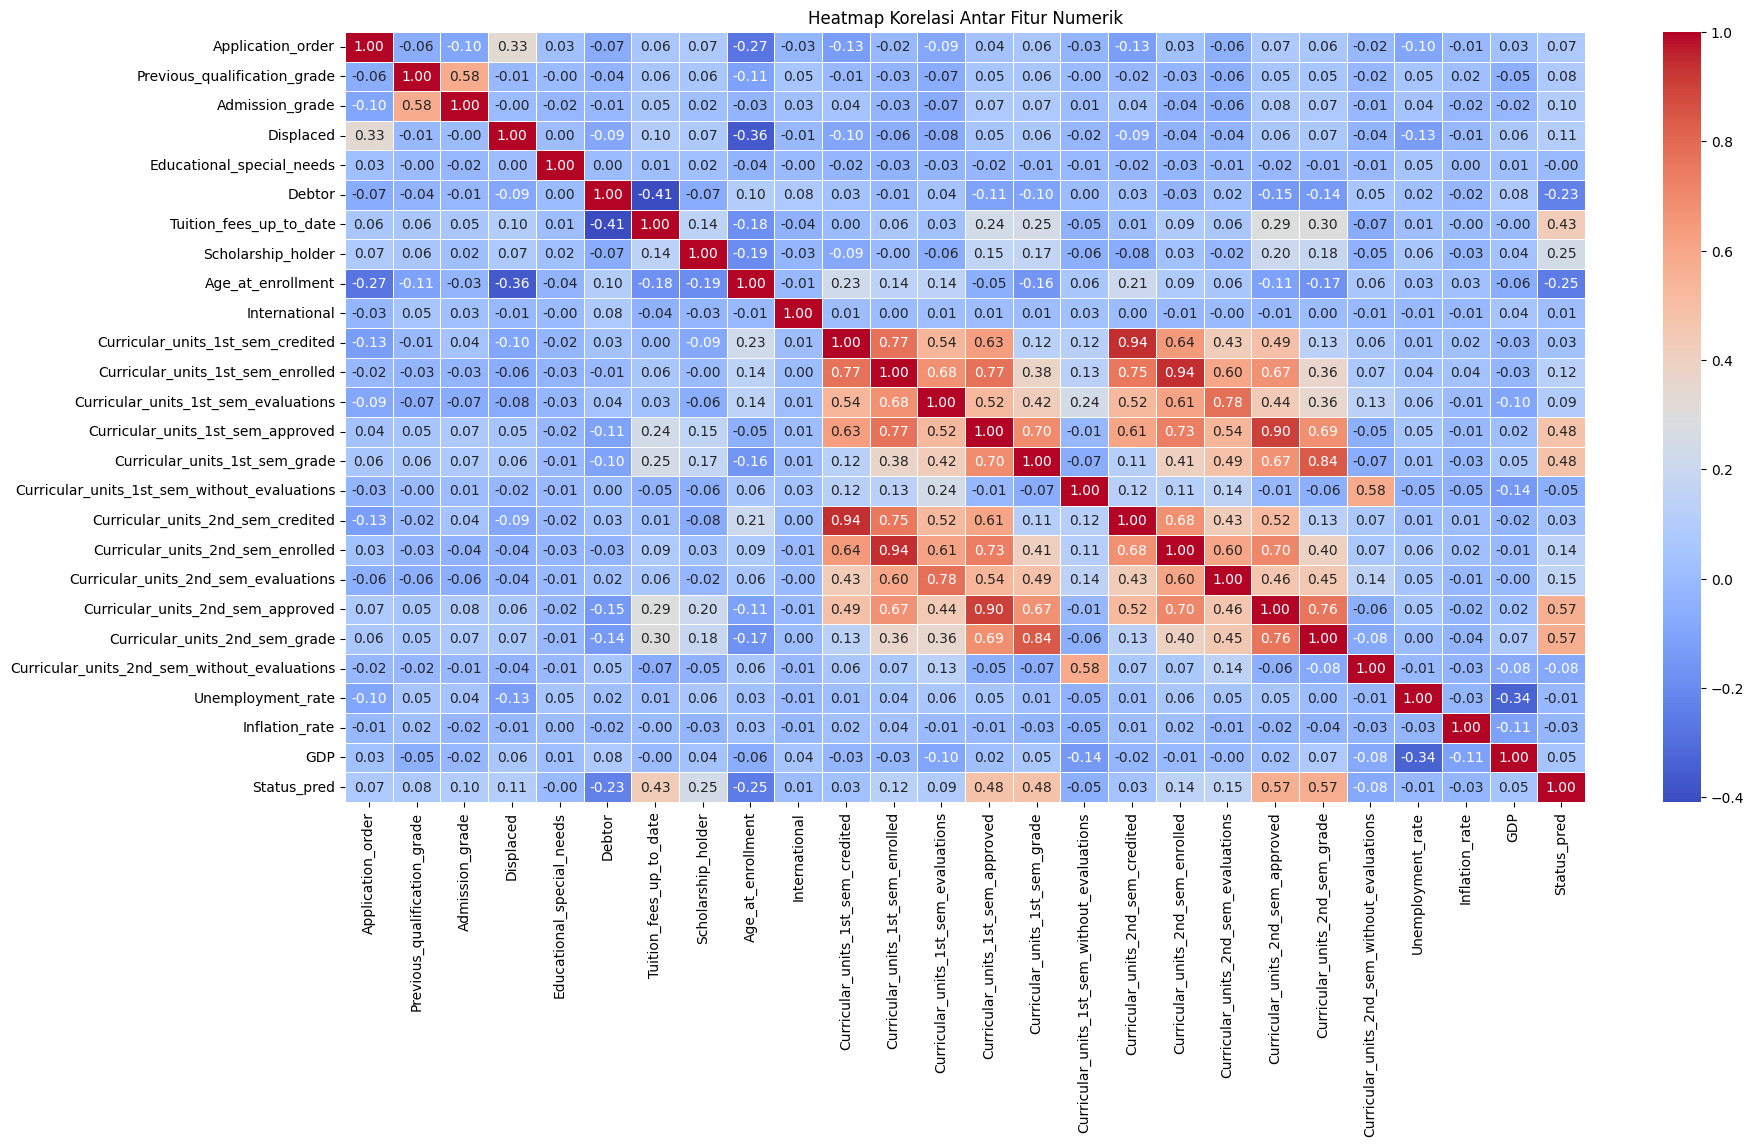

In [17]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(20, 10))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

**Heatmap Korelasi Antar Fitur Numerik**:

Visualisasi heatmap korelasi ini memberikan informasi tentang seberapa kuat hubungan antar variabel numerik dalam dataset. Nilai korelasi berkisar dari -1 (hubungan negatif sempurna) hingga 1 (hubungan positif sempurna), dengan 0 menunjukkan tidak adanya hubungan linier.

- **Korelasi Internal Fitur Akademik**
  - **Korelasi sangat kuat** ditemukan pada:
    - `Curricular_units_1st_sem_approved` dan `Curricular_units_1st_sem_grade`: **0.97**
    - `Curricular_units_2nd_sem_approved` dan `Curricular_units_2nd_sem_grade`: **0.98**
    - `Curricular_units_2nd_sem_enrolled` dan `Curricular_units_2nd_sem_evaluations`: **0.90**
  - Artinya, jumlah unit yang disetujui berkaitan erat dengan perolehan nilai di semester tersebut. Demikian juga, jumlah evaluasi berkorelasi kuat dengan jumlah unit yang diambil.

- **Korelasi Positif terhadap `Status_pred`**
  - Fitur-fitur berikut menunjukkan hubungan positif dengan status mahasiswa:
    - `Curricular_units_2nd_sem_approved`: **0.57**
    - `Curricular_units_2nd_sem_grade`: **0.57**
    - `Curricular_units_1st_sem_grade`: **0.48**
    - `Curricular_units_1st_sem_approved`: **0.48**
  - Korelasi ini menandakan bahwa semakin baik performa akademik mahasiswa, semakin besar kemungkinan mereka untuk melanjutkan studi.

- **Korelasi Negatif terhadap `Status_pred`**
  - Beberapa fitur menunjukkan korelasi negatif dengan keberhasilan akademik:
    - `Age_at_enrollment`: **-0.25**
    - `Debtor`: **-0.23**
  - Ini berarti bahwa status sebagai debitur dan usia saat masuk institusi berhubungan dengan peningkatan risiko dropout.

- **Fitur Ekonomi dan Keuangan**
  - Beberapa fitur menunjukkan korelasi positif terhadap keberhasilan akademik:
    - `Tuition_fees_up_to_date`: **0.43**
    - `Scholarship_holder`: **0.25**
  - Mahasiswa yang membayar biaya kuliah tepat waktu dan/atau mendapatkan beasiswa cenderung memiliki peluang lebih besar untuk menyelesaikan studi.

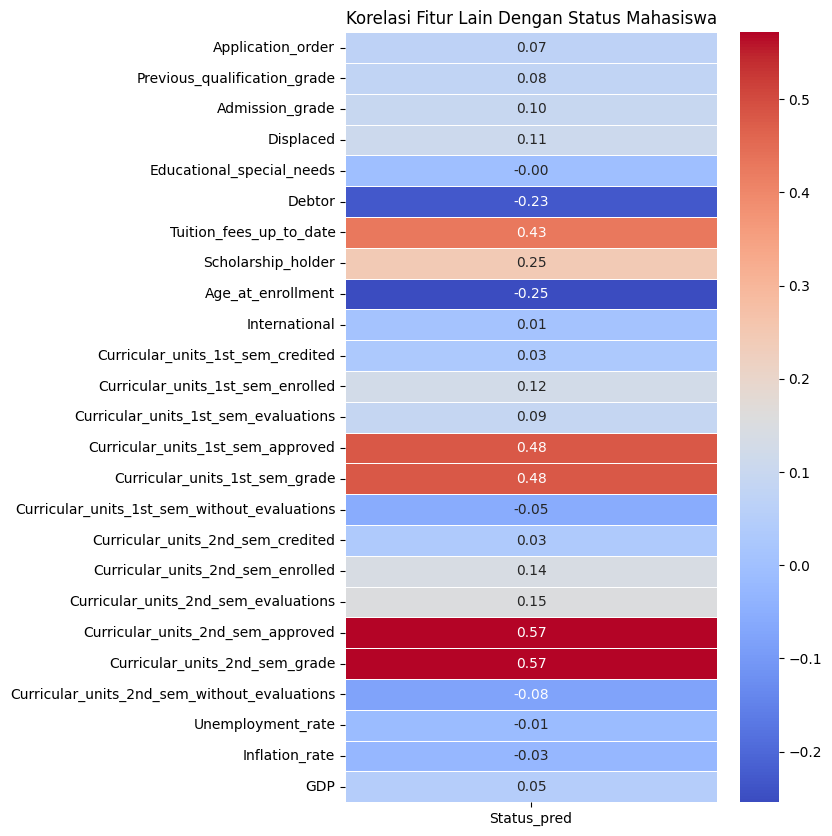

In [18]:
correlation_matrix = df[num_features].corr()

stat_corr = correlation_matrix[['Status_pred']].drop('Status_pred')

plt.figure(figsize=(6, 10))
sns.heatmap(stat_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

plt.title('Korelasi Fitur Lain Dengan Status Mahasiswa')
plt.show()

**Korelasi Fitur lain dengan Status Mahasiswa** (`Status_pred`):

- **Korelasi Positif**
  - `Curricular_units_1st_sem_approved` (**0.48**) dan `Curricular_units_1st_sem_grade` (**0.48**):  
    - Menunjukkan bahwa kinerja akademik sejak awal, terutama di semester pertama, berpengaruh besar terhadap kemungkinan mahasiswa untuk tidak dropout.

  - `Curricular_units_2nd_sem_approved` (**0.57**) dan `Curricular_units_2nd_sem_grade` (**0.57**):  
    - Merupakan dua fitur dengan korelasi paling tinggi terhadap status mahasiswa. Mahasiswa yang memiliki banyak mata kuliah disetujui dan meraih nilai tinggi di semester kedua lebih mungkin untuk bertahan dalam studi.

  - `Tuition_fees_up_to_date` (**0.43**):  
    - Mahasiswa yang membayar biaya kuliah secara tepat waktu cenderung memiliki peluang lebih besar untuk melanjutkan pendidikan tanpa terputus.

  - `Scholarship_holder` (**0.25**):  
    - Penerima beasiswa cenderung memiliki komitmen lebih tinggi terhadap pendidikan dan lebih kecil kemungkinannya untuk keluar.

- **Korelasi Negatif**
  - `Age_at_enrollment` (**-0.25**):  
    - Usia saat masuk perguruan tinggi menunjukkan hubungan negatif. Mahasiswa yang mendaftar pada usia lebih muda memiliki kecenderungan lebih tinggi untuk dropout.

  - `Debtor` (**-0.23**):  
    - Mahasiswa yang berstatus sebagai peminjam memiliki korelasi negatif terhadap keberlangsungan studi. Hal ini menunjukkan bahwa beban keuangan dapat meningkatkan kemungkinan dropout.

- **Korelasi Lemah**
  - Sebagian besar fitur lainnya menunjukkan hubungan yang lemah atau mendekati nol terhadap status mahasiswa. Misalnya:
    - `Application_order` (**0.07**)
    - `Admission_grade` (**0.10**)
    - `GDP` (**0.05**)

  - Hal ini menunjukkan bahwa fitur-fitur tersebut tidak memberikan kontribusi linier yang signifikan terhadap prediksi status akhir mahasiswa, meskipun mungkin masih berguna dalam model pembelajaran mesin yang lebih kompleks.

In [19]:
cat_features = [col for col in df.select_dtypes(include='object').columns if col != 'Status']

aov_results = {}

for col in cat_features:
    groups = [df[df[col] == val]['Status_pred'].dropna() for val in df[col].dropna().unique()]
    if len(groups) > 1:
        try:
            f_stat, p_val = f_oneway(*groups)
            aov_results[col] = {'F-stat': round(f_stat, 2), 'p-val': p_val}
        except Exception as e:
            aov_results[col] = {'error': str(e)}

aov_df = pd.DataFrame(aov_results).T.sort_values('p-val')
print(aov_df)

                            F-stat         p-val
Application_mode             25.70  4.490479e-78
Course                       19.91  5.361612e-56
Gender                      191.98  9.085401e-43
Previous_qualification       13.22  3.133945e-35
Mothers_occupation            6.83  5.470126e-28
Mothers_qualification         6.89  6.738780e-26
Fathers_qualification         5.69  5.372166e-23
Fathers_occupation            3.83  2.040340e-16
Marital_status               12.03  1.344794e-11
Daytime_evening_attendance   28.84  8.257186e-08
Nacionality                   0.88  6.101691e-01


**Analysis Of Variance untuk Fitur Kategorikal** :

Hasil uji memberikan wawasan mengenai hubungan antara masing-masing fitur dengan variabel target `Status_pred`. P-value yang sangat rendah mengindikasikan bahwa perbedaan antara kategori dalam fitur-fitur tersebut berkorelasi signifikan dengan perbedaan proporsi dropout. Dengan kata lain, fitur-fitur ini berpotensi menjadi prediktor kuat dalam model klasifikasi. Nilai p-value yang tinggi menunjukkan tidak adanya perbedaan signifikan antar kategori `Nacionality` terhadap variabel target. Oleh karena itu, fitur ini kemungkinan besar tidak memberikan kontribusi berarti dalam prediksi dan dapat dipertimbangkan untuk dikeluarkan dari model.



- **Fitur dengan hubungan signifikan**:
  - `Application_mode` (p-value: 4.49e-78)
  - `Course` (p-value: 5.36e-56)
  - `Gender` (p-value: 9.08e-43)
  - `Previous_qualification` (p-value: 3.13e-35)
  - `Mothers_occupation` (p-value: 5.47e-28)
  - `Mothers_qualification` (p-value: 6.73e-26)
  - `Fathers_qualification` (p-value: 5.37e-23)
  - `Fathers_occupation` (p-value: 2.04e-16)
  - `Marital_status` (p-value: 1.34e-11)
  - `Daytime_evening_attendance` (p-value: 8.25e-08)



- **Fitur tanpa hubungan signifikan**:
  - `Nacionality` (p-value: 6.10e-01)

In [20]:
import_cat = ['Application_mode', 'Course', 'Gender', 'Previous_qualification']
import_num = ['Age_at_enrollment', 'Scholarship_holder',
              'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
              'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
              'Debtor', 'Tuition_fees_up_to_date']

features_df = df[import_cat + import_num + ['Status_pred']]

**Pemilihan Fitur paling berpengaruh**:

Fitur-fitur berikut dipilih sebagai input utama dalam pemodelan untuk memprediksi status mahasiswa (`Status_pred`).

- **Fitur Kategorikal (`import_cat`)**:
  - `Application_mode`: Jalur pendaftaran mahasiswa, menunjukkan pengaruh signifikan terhadap kemungkinan dropout.
  - `Course`: Jenis program studi yang diambil, terbukti berkorelasi signifikan dengan status kelulusan.
  - `Gender`: Jenis kelamin mahasiswa, menunjukkan perbedaan signifikan dalam pola dropout.
  - `Previous_qualification`: Latar belakang pendidikan sebelumnya, turut memengaruhi kesiapan akademik mahasiswa.

- **Fitur Numerikal (`import_num`)**:
  - `Age_at_enrollment`: Usia saat mendaftar, bisa menjadi indikator kesiapan atau beban tanggung jawab di luar akademik.
  - `Scholarship_holder`: Status penerima beasiswa, yang umumnya berdampak pada motivasi dan komitmen belajar.
  - `Curricular_units_1st_sem_approved`: Jumlah mata kuliah semester 1 yang disetujui, mencerminkan performa awal.
  - `Curricular_units_1st_sem_grade`: Nilai rata-rata semester 1, indikator kuat keberhasilan awal.
  - `Curricular_units_2nd_sem_approved`: Jumlah mata kuliah semester 2 yang disetujui.
  - `Curricular_units_2nd_sem_grade`: Nilai rata-rata semester 2.
  - `Debtor`: Status mahasiswa dalam hal tunggakan pembayaran, yang bisa berpengaruh pada kelanjutan studi.
  - `Tuition_fees_up_to_date`: Apakah biaya kuliah dibayar tepat waktu, berpengaruh terhadap dropout terutama dari sisi ekonomi.

Fitur-fitur ini dipilih karena memiliki keterkaitan yang kuat baik secara statistik maupun secara kontekstual terhadap kemungkinan seorang mahasiswa untuk dropout atau tetap melanjutkan studi.

In [21]:
for col in import_cat:
    print("\n" + "=" * len(col))
    print(col.upper())
    print("=" * len(col))
    print(features_df[col].value_counts())


APPLICATION_MODE
Application_mode
1st Phase - General Contingent                         1708
2nd Phase - General Contingent                          872
Over 23 Years Old                                       785
Change of Course                                        312
Technological Specialization Diploma Holders            213
Holders of Other Higher Courses                         139
3rd Phase - General Contingent                          124
Transfer                                                 77
Change of Institution/Course                             59
1st Phase - Special Contingent (Madeira Island)          38
Short Cycle Diploma Holders                              35
International Student (Bachelor)                         30
1st Phase - Special Contingent (Azores Island)           16
Ordinance No. 854-B/99                                   10
Ordinance No. 612/93                                      3
Change of Institution/Course (International)              1
Ordin

**Distribusi Fitur Kategorikal**:

- `Application_mode`:
  - Mayoritas mahasiswa mendaftar melalui jalur `1st Phase - General Contingent` **(1708)**, diikuti `2nd Phase - General Contingent` **(872)** dan `Over 23 Years Old` **(785)**.
  - Beberapa kategori lain memiliki jumlah yang sangat kecil seperti `Ordinance No. 533-A/99, Item B2 (Different Plan)` **(1)**.
  - Variasi jumlah antar kategori ini perlu diperhatikan saat melakukan encoding.

- `Course`:
  - Program studi dengan jumlah mahasiswa terbanyak adalah `Nursing` **(766)**, diikuti oleh `Management` **(380)** dan `Social Service` **(355)**.
  - Beberapa jurusan seperti `Biofuel Production Technologies` memiliki jumlah yang sangat sedikit **(12)**.
  - Ketimpangan ini bisa berpengaruh terhadap generalisasi model.

- `Gender`:
  - Dataset didominasi oleh mahasiswa `Female` **(2868)** dibandingkan `Male` **(1556)**.
  - Ini menunjukkan adanya ketidakseimbangan demografi yang signifikan dalam data.

- `Previous_qualification`:
  - Sebagian besar mahasiswa berasal dari latar belakang `Secondary Education - 12th Year of Schooling or Eq.` **(3717)**.
  - Beberapa kategori seperti `Higher Education - Doctorate` **(1)** atau `10th Year of Schooling` **(1)** sangat jarang muncul.
  - Hal ini penting untuk diperhatikan saat melakukan encoding agar tidak menimbulkan *sparsity*.


In [22]:
oh_encoder = OneHotEncoder(drop='first', dtype=int, sparse_output=False, handle_unknown='ignore')
enc_cat = oh_encoder.fit_transform(features_df[import_cat])
enc_cat_cols = oh_encoder.get_feature_names_out(import_cat)

encoded_df = pd.DataFrame(enc_cat, columns=enc_cat_cols, index=features_df.index)
num_cols = features_df.drop(columns=import_cat + ['Status_pred']).columns

features_df_final = pd.concat([
    features_df[num_cols], encoded_df, features_df['Status_pred']
], axis=1)

**Analisis Proses One-Hot Encoding**:

- **Inisialisasi Encoder**:
  - Objek `OneHotEncoder` diinisialisasi dengan parameter:
    - `drop='first'`: Menghindari multicollinearity dengan menghapus kategori pertama.
    - `dtype=int`: Output berupa integer.
    - `sparse_output=False`: Output dalam bentuk array biasa, bukan sparse matrix.
    - `handle_unknown='ignore'`: Menghindari error jika ada kategori tak dikenal saat transformasi.

- **Transformasi Kategorikal**:
  - Kolom-kolom kategorikal yang dipilih (`import_cat`) diubah menjadi representasi one-hot menggunakan `fit_transform()`.
  - Encoder mempelajari kategori unik di setiap kolom dan membuat kolom baru untuk masing-masing, kecuali yang pertama.

- **Pembuatan DataFrame & Penggabungan Data**:
  - Hasil encoding berupa array NumPy dikonversi kembali menjadi DataFrame Pandas menggunakan nama kolom dari `get_feature_names_out()`.
  - Ini menghasilkan kolom seperti `Gender_Male`, `Course_Management`, dll., yang mudah dipahami dan digunakan.
  - Data (`features_df_final`) dibentuk dengan menggabungkan:
    - Kolom numerik asli yang dipilih (`import_num`).
    - Hasil One-Hot Encoding.
    - Kolom target `Status_pred`.

&nbsp;

**Kesimpulan**:
- Dataset `features_df_final` kini sepenuhnya terdiri dari fitur numerik, siap digunakan untuk pelatihan model machine learning.
- Proses ini menjaga struktur data yang bersih, menghindari multicollinearity, dan memungkinkan algoritma memahami fitur kategorikal secara efektif.

### **Outliers**

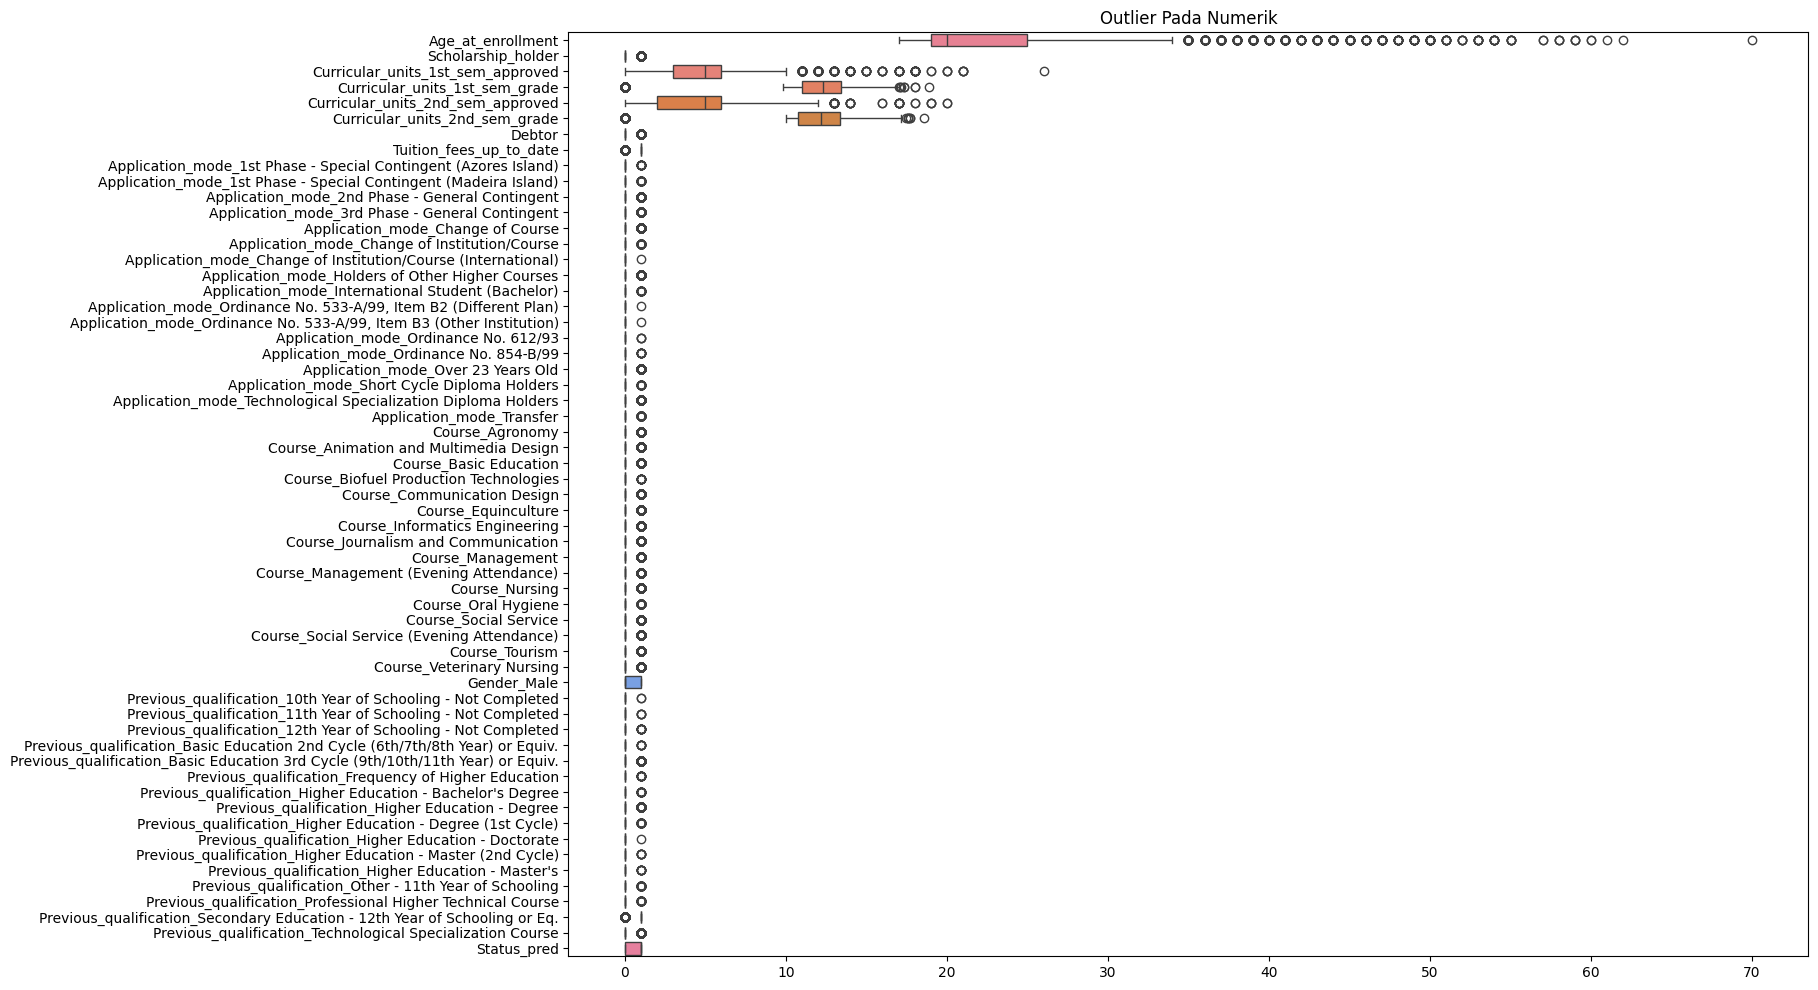

In [23]:
plt.figure(figsize=(16, 12))
sns.boxplot(data=features_df_final.select_dtypes(include=np.number), orient='h')
plt.title("Outlier Pada Numerik")
plt.show()

**Outliers**:

- **Variasi skala antar fitur**:
  - Contohnya, `Age_at_enrollment` memiliki rentang nilai yang jauh lebih besar dibandingkan fitur-fitur biner seperti `Gender_Male` atau `Application_mode_1st Phase - General Contingent` yang hanya memiliki nilai 0 atau 1.

- **Ditemukan outlier pada beberapa fitur:**
  - Pada `Age_at_enrollment`, terlihat outlier pada usia-usia yang lebih tinggi, mengindikasikan adanya mahasiswa yang mendaftar pada usia yang jauh di atas rata-rata.
  - Fitur akademik seperti `Curricular_units_1st_sem_approved`, `Curricular_units_1st_sem_grade`, `Curricular_units_2nd_sem_approved`, dan `Curricular_units_2nd_sem_grade` juga mengandung outlier, baik di nilai yang rendah maupun tinggi, yang mencerminkan keberagaman performa akademik mahasiswa.

- **Fitur biner menunjukkan distribusi khas**:
  - Nilainya terbatas hanya pada 0 dan 1, sehingga boxplot menunjukkan distribusi yang terkonsentrasi pada dua titik ini.
  - Umumnya nilai 0 lebih dominan, mencerminkan bahwa sebagian besar data tidak termasuk dalam kategori tersebut.

- **Dibutuhkan proses scaling**:
  - Scaling seperti StandardScaler atau MinMaxScaler penting dilakukan agar tidak ada fitur dengan skala besar yang mendominasi pembelajaran model.
  - Walaupun model seperti Random Forest relatif tahan terhadap outlier, scaling tetap dibutuhkan untuk memastikan setiap fitur memiliki kontribusi yang setara.









## **Exploratory Data Analysis (EDA)**

**Exploratory Data Analysis (EDA)** adalah proses menganalisis data yang bertujuan untuk memahami struktur, pola, dan hubungan dalam dataset.

In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Application_mode                   4424 non-null   object 
 1   Course                             4424 non-null   object 
 2   Gender                             4424 non-null   object 
 3   Previous_qualification             4424 non-null   object 
 4   Age_at_enrollment                  4424 non-null   int64  
 5   Scholarship_holder                 4424 non-null   int64  
 6   Curricular_units_1st_sem_approved  4424 non-null   int64  
 7   Curricular_units_1st_sem_grade     4424 non-null   float64
 8   Curricular_units_2nd_sem_approved  4424 non-null   int64  
 9   Curricular_units_2nd_sem_grade     4424 non-null   float64
 10  Debtor                             4424 non-null   int64  
 11  Tuition_fees_up_to_date            4424 non-null   int64

In [ ]:
features_df.describe(include='all')

,Application_mode,Course,Gender,Previous_qualification,Age_at_enrollment,Scholarship_holder,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Debtor,Tuition_fees_up_to_date,Status_pred
count,4424,4424,4424,4424,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
unique,18,17,2,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1st Phase - General Contingent,Nursing,Female,Secondary Education - 12th Year of Schooling o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1708,766,2868,3717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,23.265145,0.248418,4.706600,10.640822,4.435805,10.230206,0.113698,0.880651,0.678797
std,NaN,NaN,NaN,NaN,7.587816,0.432144,3.094238,4.843663,3.014764,5.210808,0.317480,0.324235,0.466991
min,NaN,NaN,NaN,NaN,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,19.000000,0.000000,3.000000,11.000000,2.000000,10.750000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,20.000000,0.000000,5.000000,12.285714,5.000000,12.200000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,25.000000,0.000000,6.000000,13.400000,6.000000,13.333333,0.000000,1.000000,1.000000


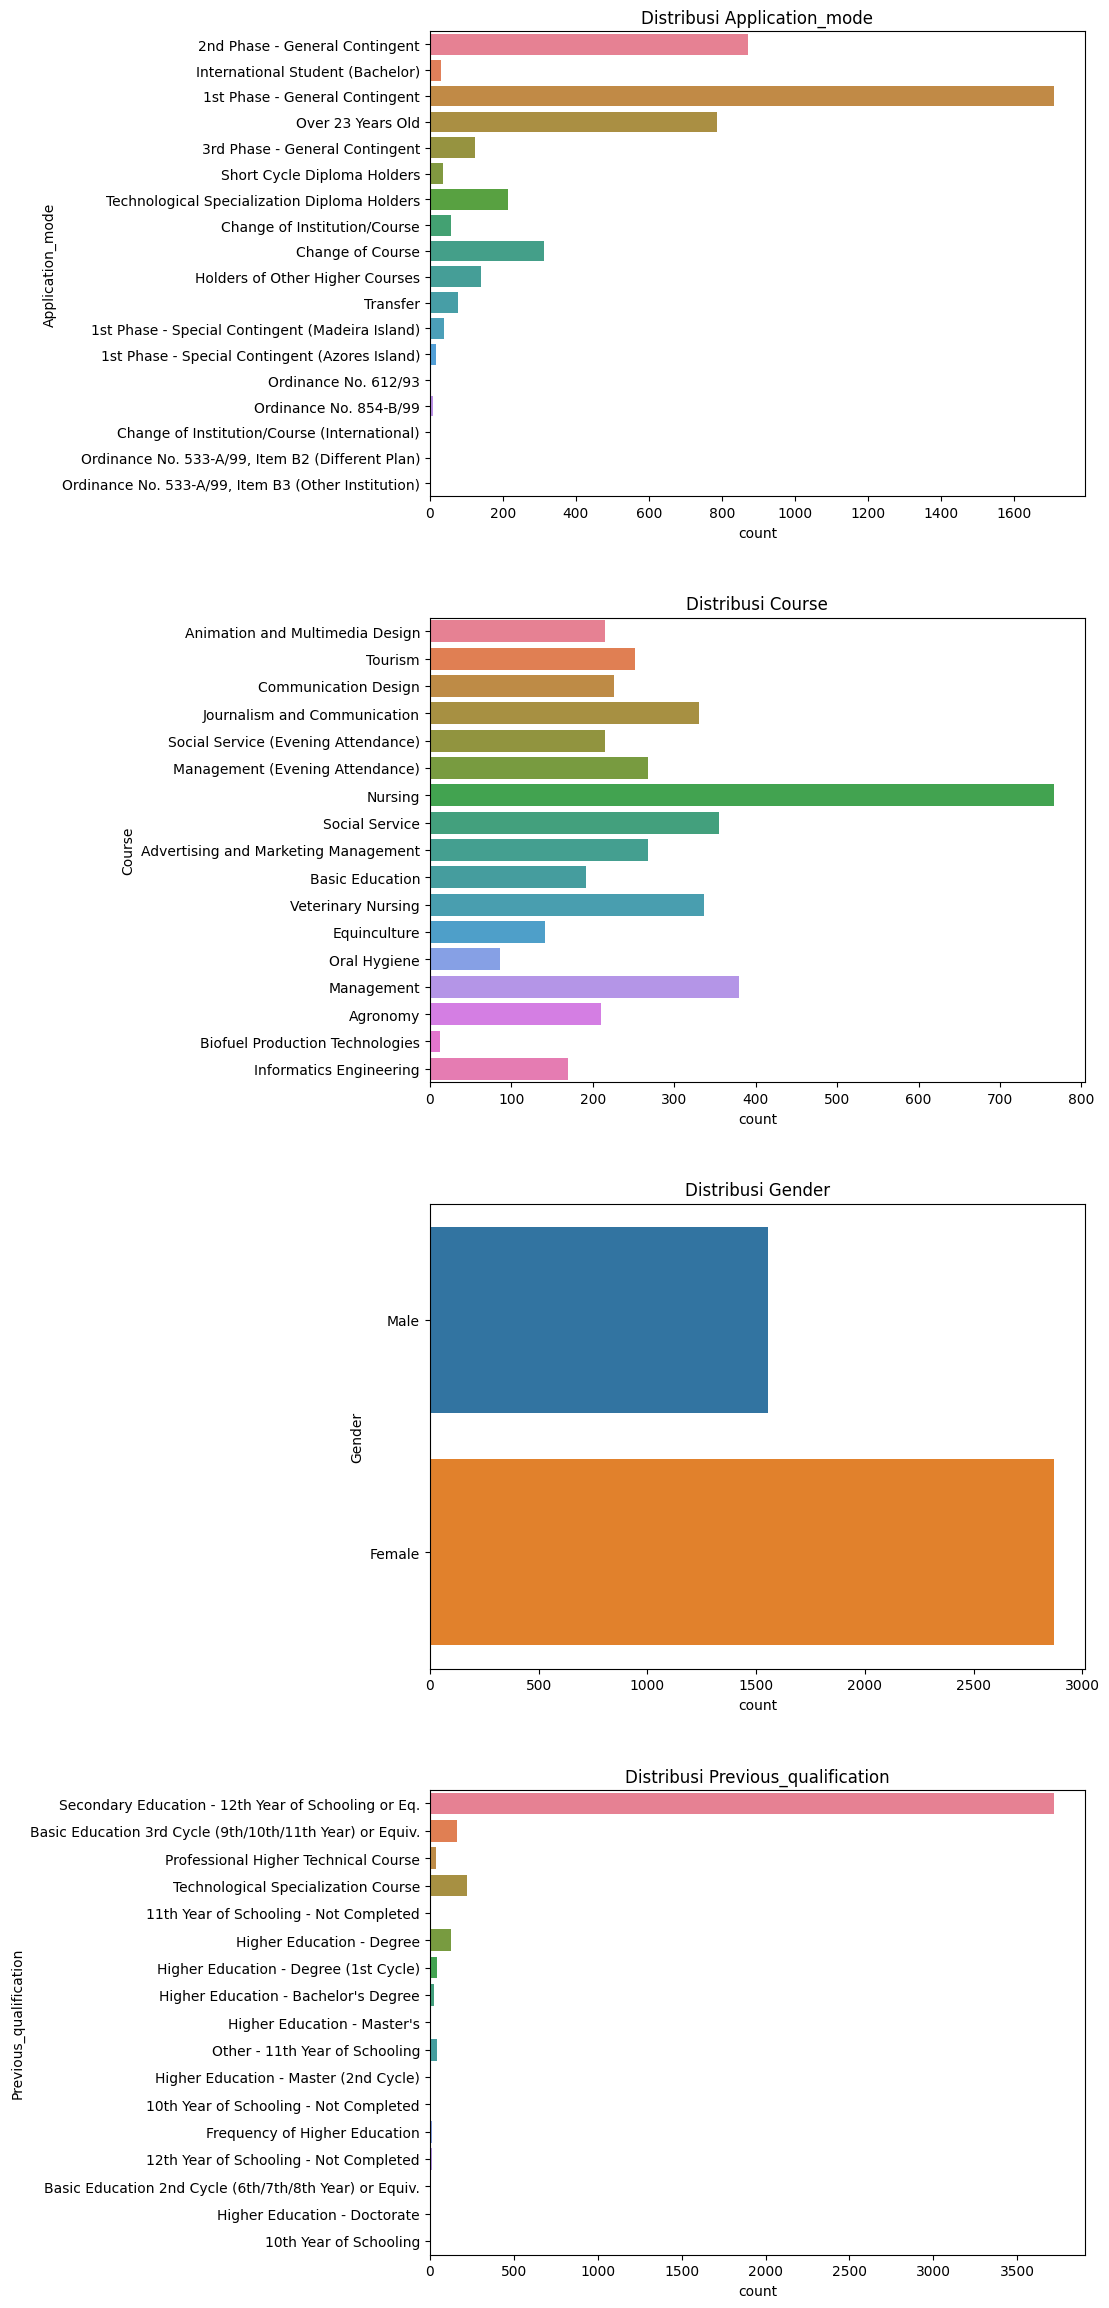

In [ ]:
fig, ax = plt.subplots(len(import_cat), 1, figsize=(12, 6 * len(import_cat)))

for i, feature in enumerate(import_cat):
    sns.countplot(data=features_df, y=feature, hue=feature, ax=ax[i])
    ax[i].set_title(f'Distribusi {feature}')
    ax[i].tick_params(axis='y')

plt.tight_layout(pad=4.0)
plt.show()

**Visualisasi Distribusi Fitur Kategorikal**:

- **`Application_mode`**
  - Terlihat bahwa mayoritas mahasiswa mendaftar melalui jalur "1st Phase - General Contingent".
  - Disusul oleh "2nd Phase - General Contingent" dan "Over 23 Years Old".
  - Sebagian besar kategori lainnya memiliki jumlah yang sangat sedikit, menciptakan distribusi dengan ekor panjang.

- **`Course`**
  - Program studi "Nursing" mendominasi jumlah mahasiswa secara signifikan.
  - "Management" dan "Social Service" juga cukup populer, tetapi masih jauh di bawah Nursing.
  - Beberapa jurusan lain hanya memiliki sedikit mahasiswa.

- **`Gender`**
  - Terdapat ketimpangan yang mencolok, di mana jumlah mahasiswa perempuan jauh lebih banyak dibandingkan laki-laki.

- **`Previous_qualification`**
  - Sebagian besar mahasiswa berasal dari latar belakang "Secondary Education - 12th Year of Schooling or Equivalent".
  - Kualifikasi lainnya jauh lebih sedikit proporsinya.

- **Kesimpulan**:
  
  Visualisasi memberikan pemahaman yang lebih jelas tentang dominasi beberapa kategori dan ketimpangan distribusi fitur kategorikal. Kategori dengan frekuensi rendah dapat memengaruhi performa model prediksi.

In [ ]:
def cat_plot(features, df, segment_feature="Status_pred"):
    fig, ax = plt.subplots(len(features), 1, figsize=(18, 6 * len(features)))

    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])

        ax[i].set_title(f'Distribusi {feature} Berdasarkan {segment_feature}', fontsize=12)
        ax[i].tick_params(axis='x', rotation=0)

        ax[i].legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(pad=3.0)
    plt.show()

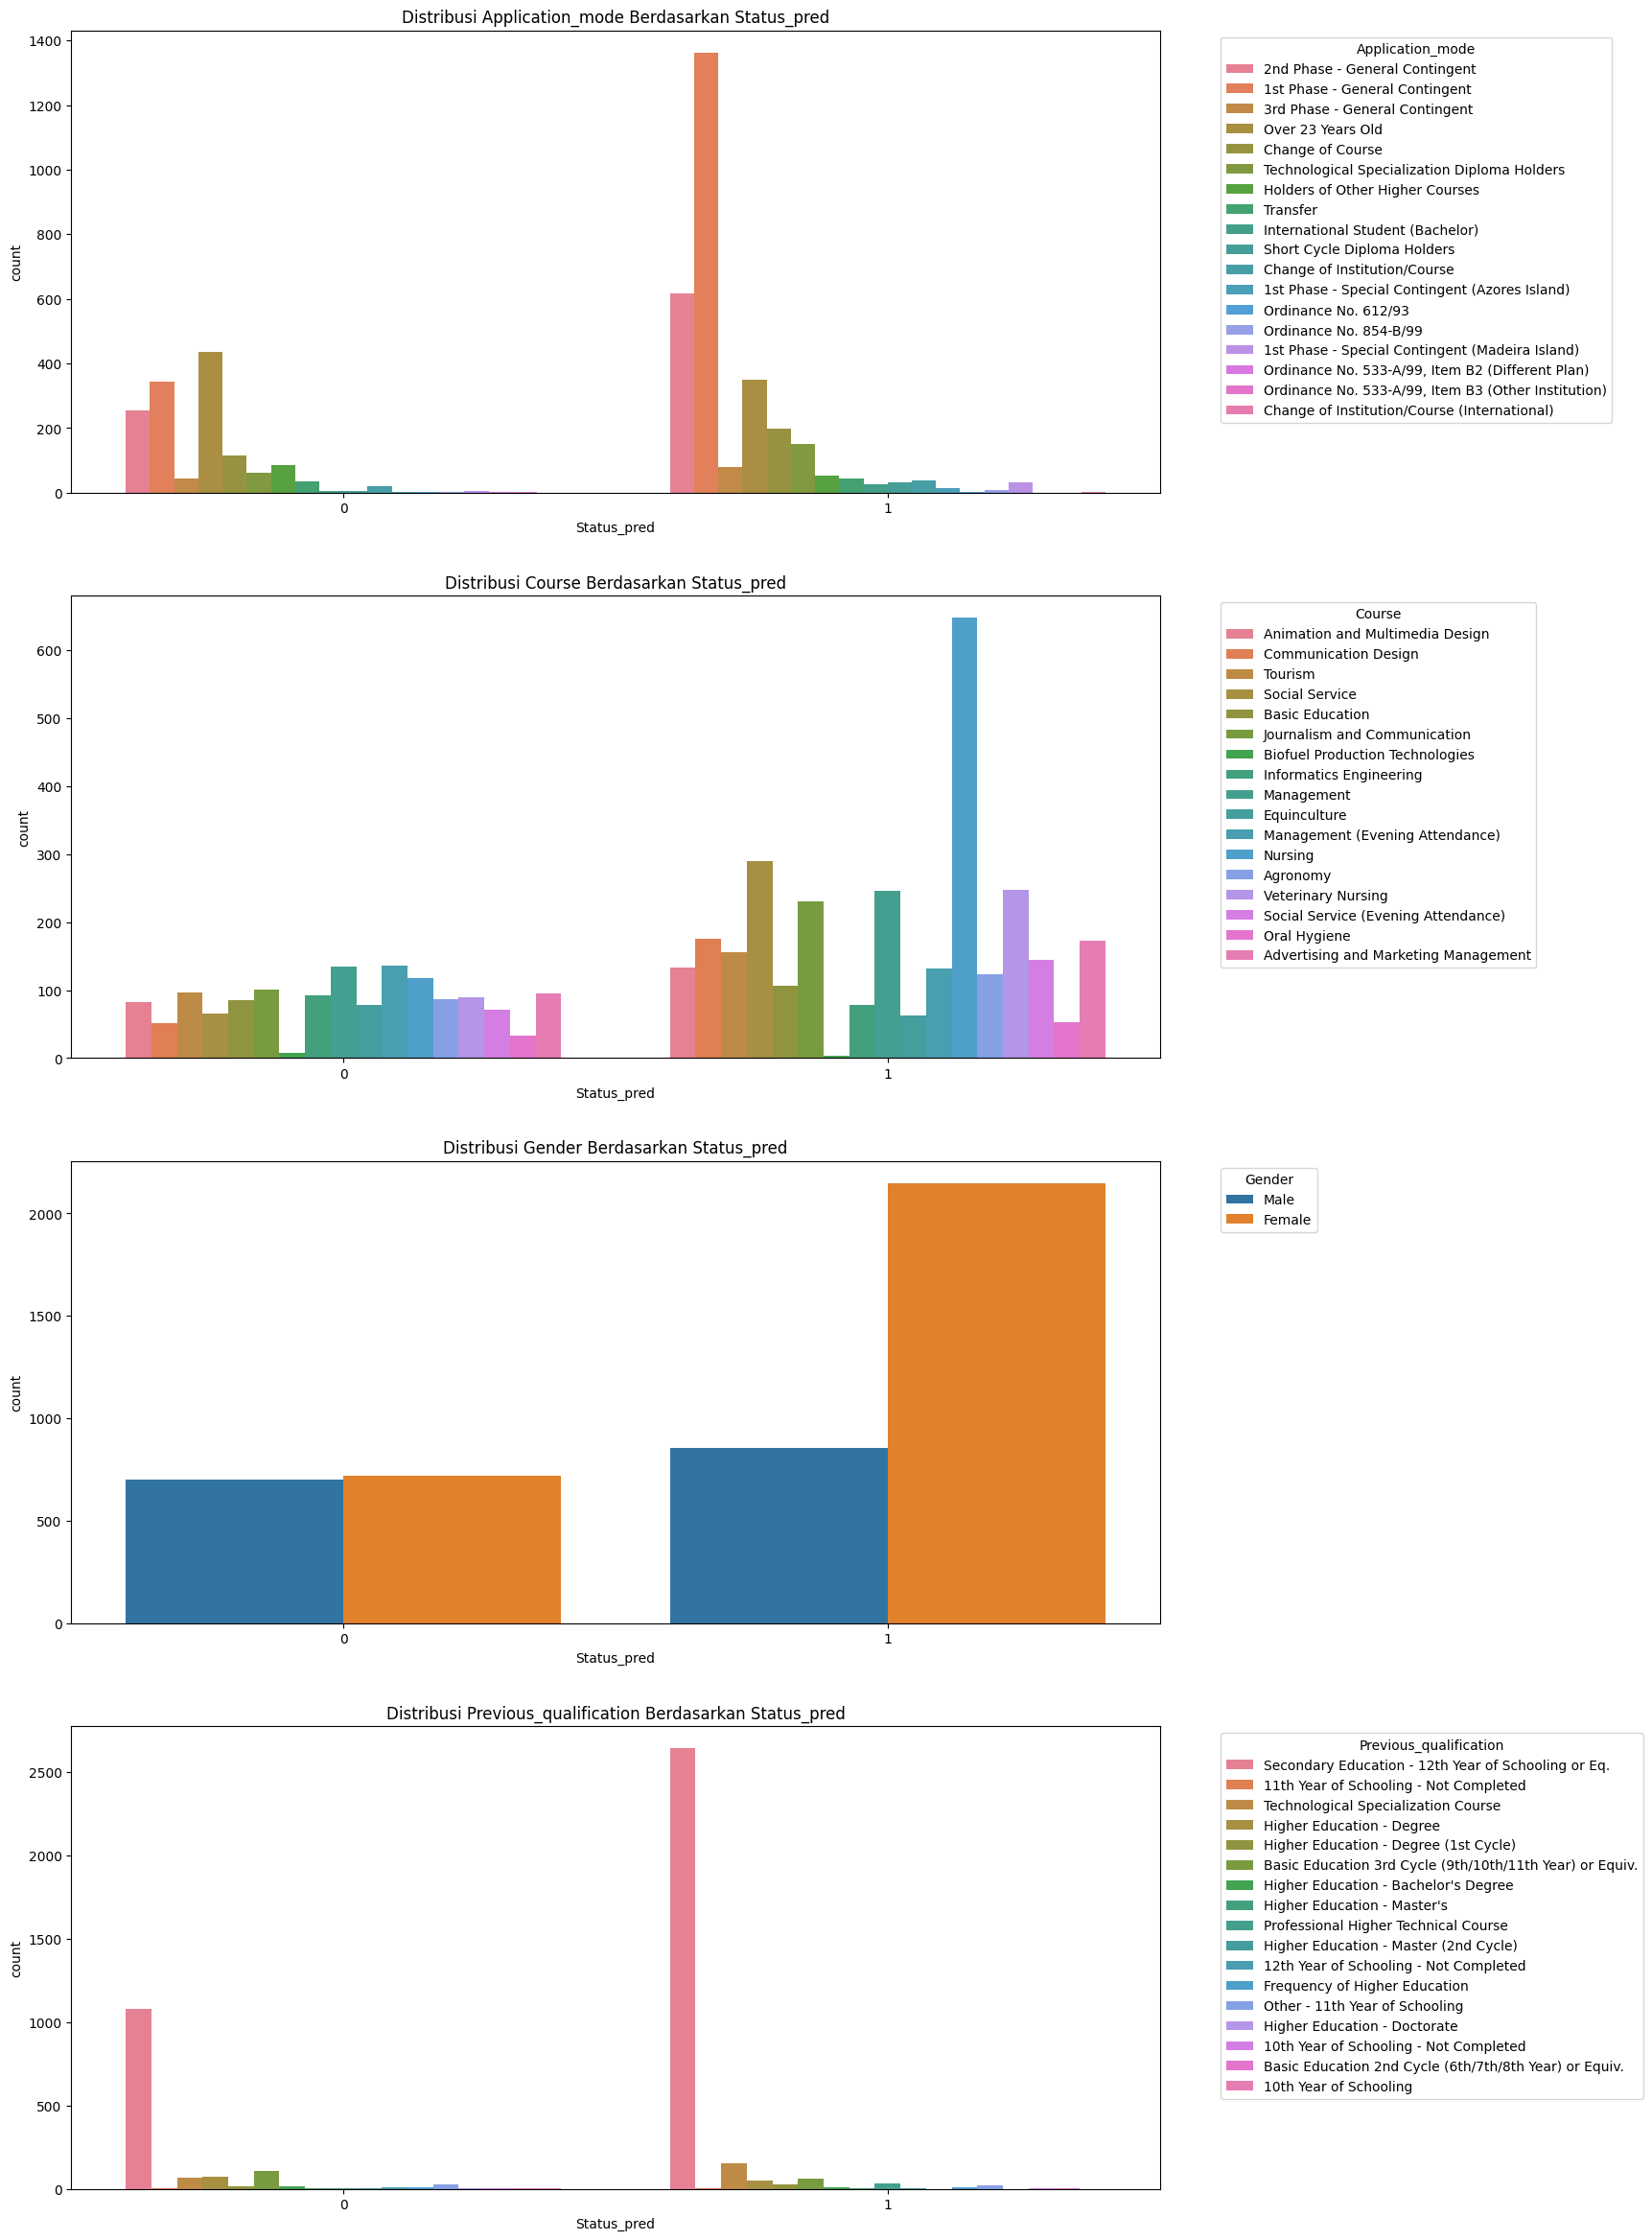

In [ ]:
cat_plot(features=import_cat, df=features_df)

**Visualisasi Distribusi Fitur Kategorikal Berdasarkan Status**:

- **`Application_mode` vs `Status_pred`**:
  - Jalur pendaftaran "1st Phase - General Contingent" mendominasi baik pada mahasiswa yang dropout (0) maupun yang tidak dropout (1). Namun, proporsi mahasiswa yang tidak dropout lebih besar pada jalur ini dibandingkan yang dropout.
  - Jalur lain seperti "2nd Phase - General Contingent" dan "Change of Course" memiliki jumlah mahasiswa dropout yang cukup tinggi dibandingkan total mereka.
  - Beberapa jalur aplikasi lainnya menunjukkan pola distribusi yang bervariasi, namun karena jumlahnya kecil, perlu kehati-hatian dalam interpretasi.

- **`Course` vs `Status_pred`**:
  - Program studi "Nursing" memiliki jumlah mahasiswa tidak dropout paling tinggi, mengindikasikan tingkat retensi yang baik di jurusan ini.
  - Jurusan seperti "Social Service", "Veterinary Nursing", dan "Biofuel Production Technologies" tampak memiliki jumlah mahasiswa dropout yang tinggi jika dibandingkan dengan total pendaftar di jurusan tersebut. Ini menunjukkan bahwa ada potensi risiko dropout lebih besar pada beberapa program studi tertentu.

- **`Gender` vs `Status_pred`**:
  - Mahasiswa perempuan memiliki jumlah keseluruhan yang lebih besar dibanding laki-laki. Ini menunjukkan bahwa mahasiswa laki-laki cenderung lebih rentan mengalami dropout dibanding perempuan.

- **`Previous_qualification` vs `Status_pred`**:
  - Sebagian besar mahasiswa berasal dari latar belakang pendidikan "Secondary Education - 12th Year of Schooling or Equivalent".
  - Kualifikasi lain seperti "Basic Education 3rd Cycle" dan "Technological Specialization Course" menunjukkan proporsi dropout yang relatif tinggi. Ini mengindikasikan bahwa latar belakang pendidikan awal bisa berpengaruh terhadap kemungkinan dropout.

In [ ]:
def num(features, df):
    fig, ax = plt.subplots(len(features), 1, figsize=(16, 5 * len(features)))
    for i, feature in enumerate(features):
        sns.histplot(df[feature], kde=True, ax=ax[i], bins=30)
        ax[i].set_title(f'Distribusi {feature}', fontsize=12)
        ax[i].set_xlabel(feature, fontsize=10)
        ax[i].tick_params(axis='x')

    plt.tight_layout(pad=3.0)
    plt.show()

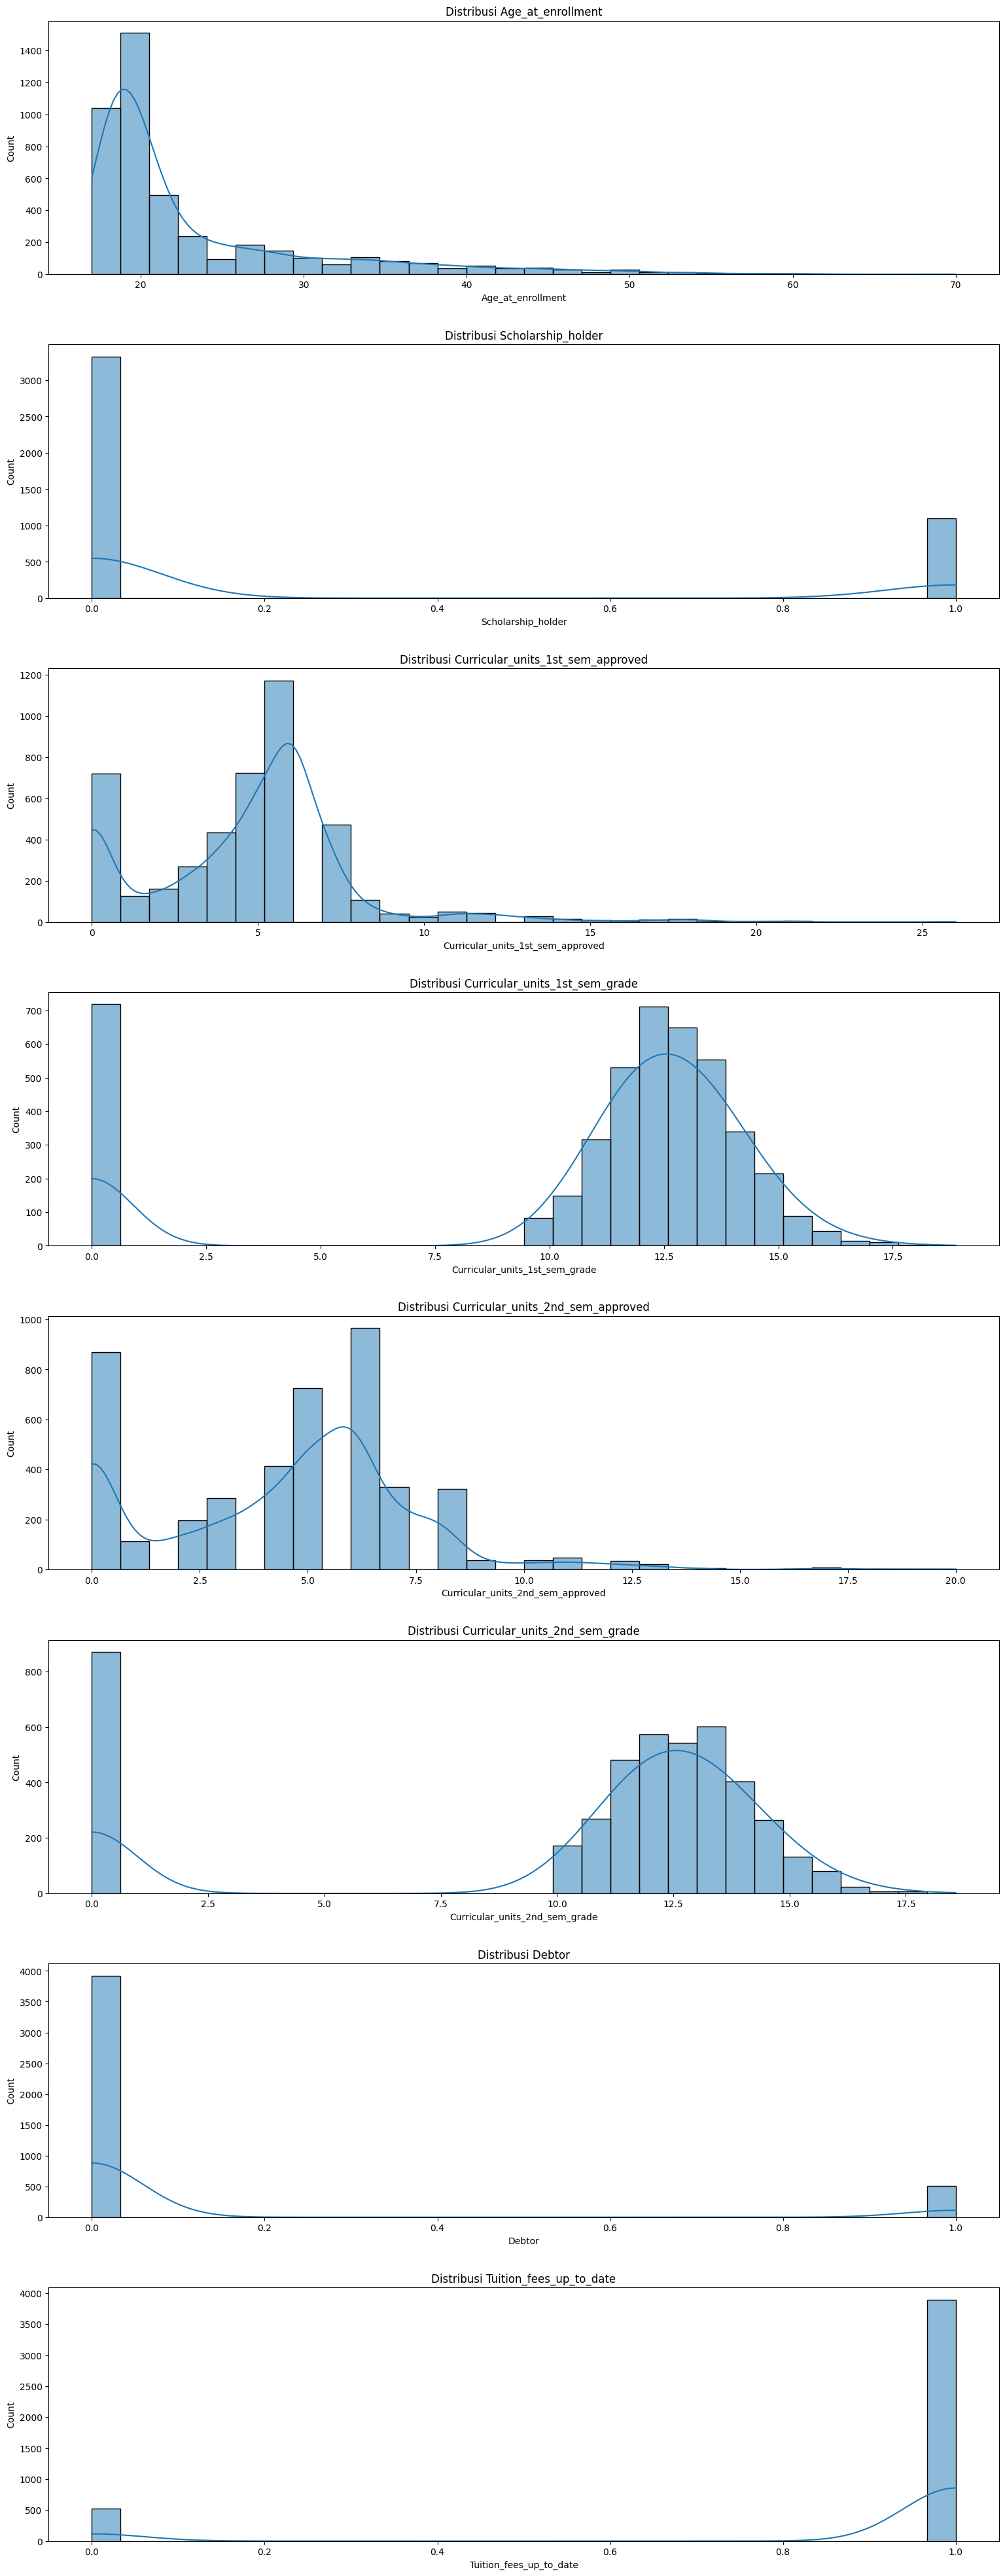

In [ ]:
num(import_num, features_df)

**Visualisasi Distribusi Fitur Numerik**:

- **`Age_at_enrollment`**
  - Distribusinya miring ke kanan (positively skewed).
  - Sebagian besar mahasiswa mendaftar pada usia muda.
  - Distribusi memiliki “ekor” panjang ke kanan, menunjukkan adanya outlier dengan usia lebih tua.

- **`Curricular_units_1st_sem_approved` & `Curricular_units_2nd_sem_approved`**
  - Kedua fitur ini menunjukkan distribusi multimodal.
  - Terdapat puncak pada nilai 0 (banyak mahasiswa tidak menyetujui unit) serta puncak lain di sekitar 5–6 unit.
  - Ini mengindikasikan adanya kelompok mahasiswa dengan pencapaian akademik yang berbeda.

- **`Curricular_units_1st_sem_grade` & `Curricular_units_2nd_sem_grade`**
  - Kedua fitur nilai memperlihatkan distribusi yang condong ke kiri (negatively skewed).
  - Sebagian besar nilai berkumpul di rentang 10–15.
  - Ini menunjukkan bahwa mayoritas mahasiswa mendapatkan nilai yang cukup baik.

- **`Tuition_fees_up_to_date`, `Scholarship_holder` & `Debtor`**
  - Ketiganya adalah fitur biner dan memiliki distribusi yang sangat tidak seimbang.
    - `Tuition_fees_up_to_date`: Didominasi oleh nilai 1 (mayoritas mahasiswa membayar tepat waktu).
    - `Scholarship_holder`: Didominasi oleh nilai 0 (kebanyakan mahasiswa bukan penerima beasiswa).
    - `Debtor`: Didominasi oleh nilai 0 (mayoritas mahasiswa tidak memiliki utang).
  - Ketidakseimbangan ini mencerminkan proporsi nyata dari populasi mahasiswa.

In [ ]:
def num_plot(features, df, segment_feature="Status_pred"):
    fig, axes = plt.subplots(len(features), 1, figsize=(16, 5 * len(features)))
    if len(features) == 1:
        axes = [axes]

    for i, feature in enumerate(features):
        sns.histplot(data=df, x=feature, hue=segment_feature, hue_order=[1, 0], kde=True, multiple='stack', ax=axes[i], bins=30)
        axes[i].set_title(f'Distribusi {feature} Berdasarkan {segment_feature}')
        axes[i].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

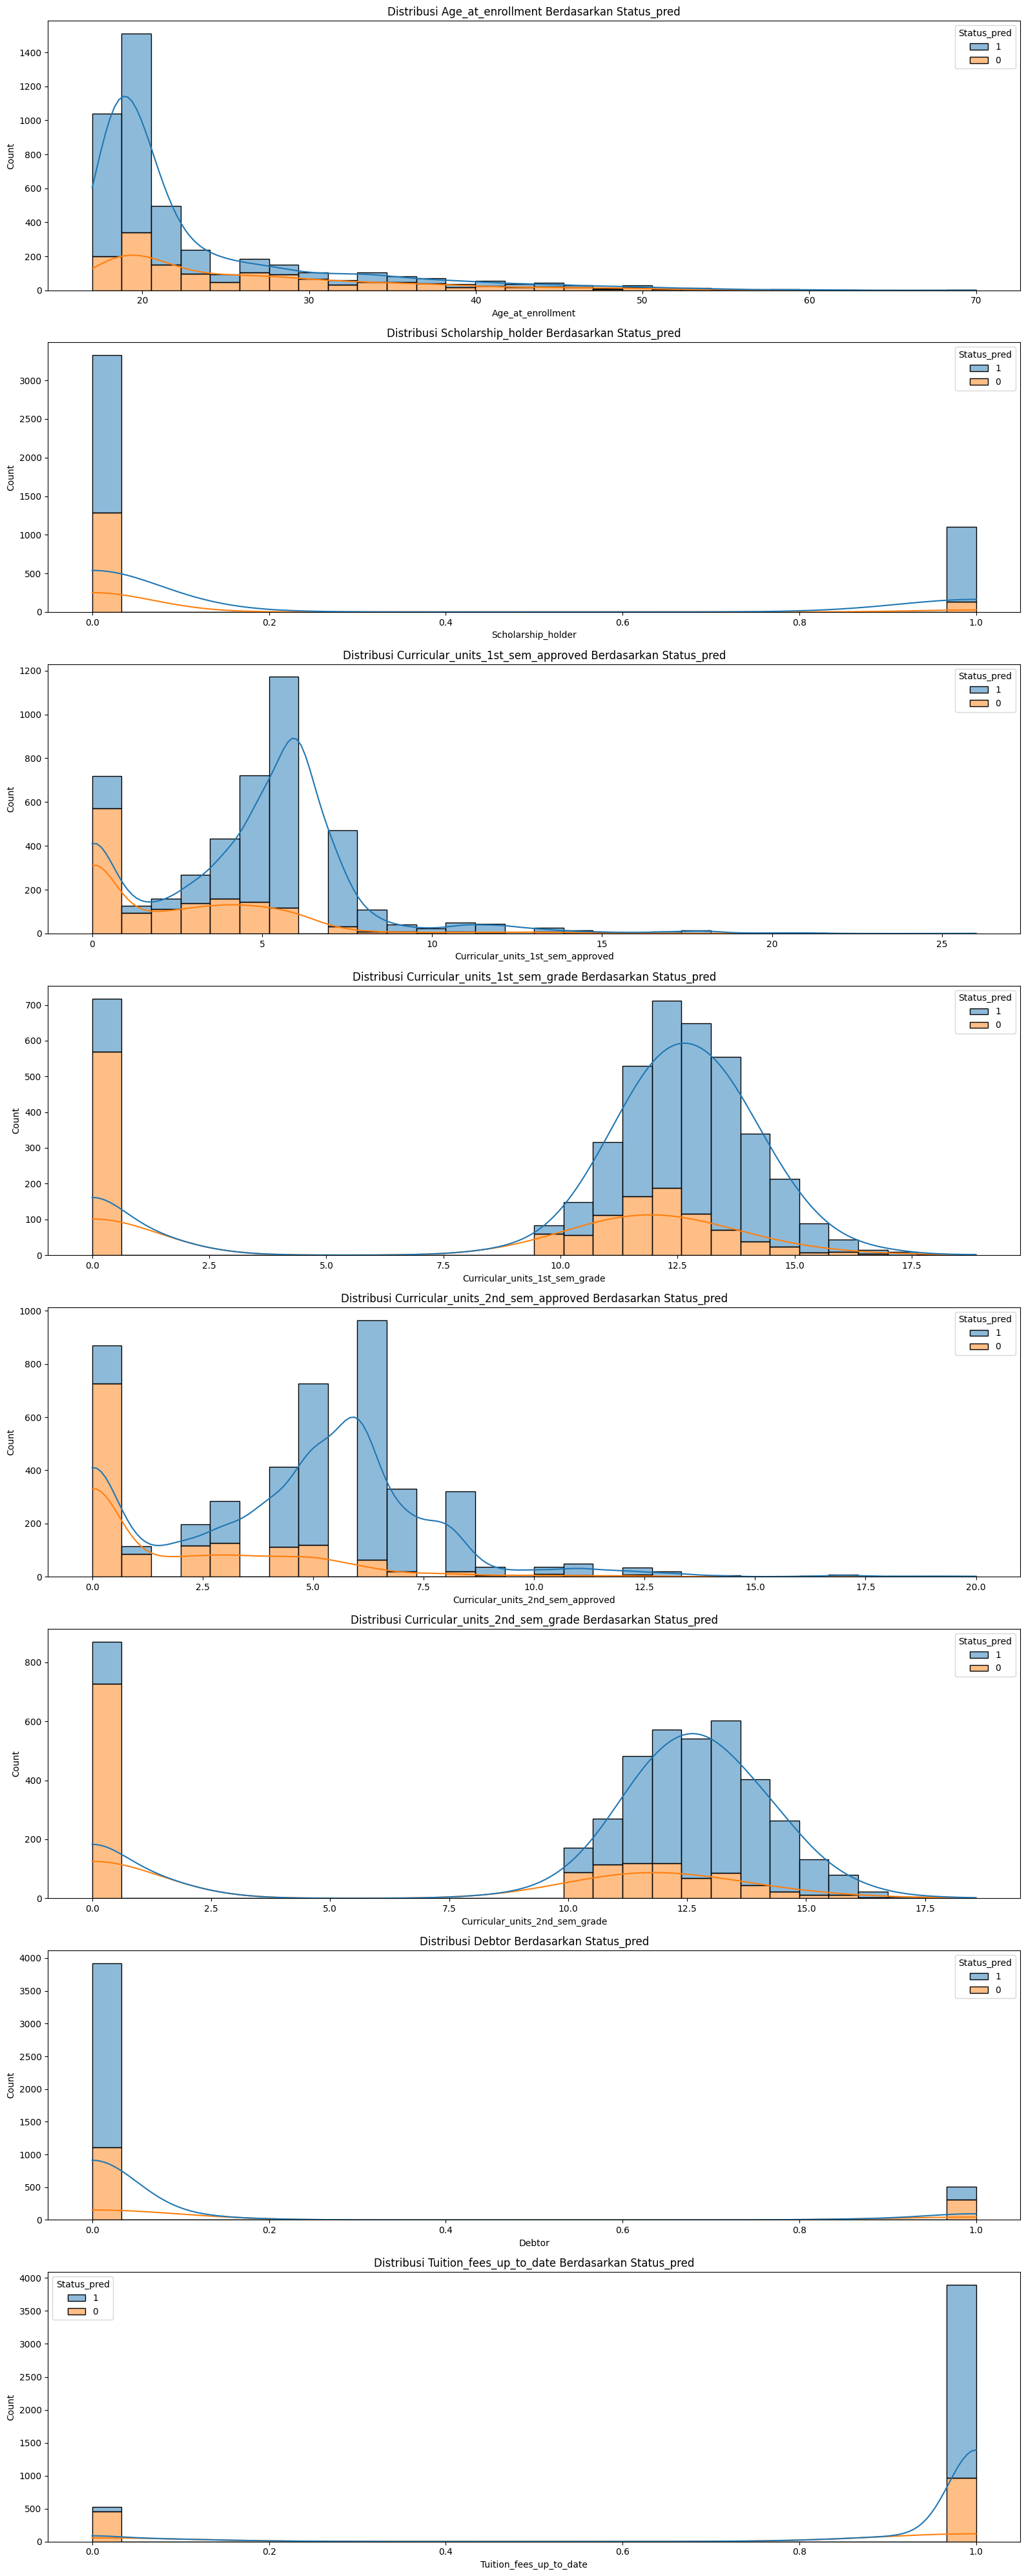

In [ ]:
num_plot(import_num, features_df)

**Visualisasi Distribusi Fitur Numerik Berdasarkan Status**:

- **`Age_at_enrollment`**
  - Mahasiswa berusia muda saat mendaftar memiliki kecenderungan lebih tinggi untuk dropout (oranye)
  - Usia lebih tua menunjukkan pola tidak dropout yang lebih kuat (biru)

- **`Scholarship_holder`**
  - Dropout lebih banyak terjadi pada mahasiswa yang tidak menerima beasiswa (oranye)
  - Sebaliknya, penerima beasiswa lebih cenderung untuk tetap melanjutkan studi (biru)

- **`Curricular_units_1st_sem_approved` & `Curricular_units_2nd_sem_approved`**
  - Mahasiswa dengan jumlah unit disetujui sedikit cenderung mengalami dropout (oranye)
  - Sebaliknya, jumlah unit yang lebih tinggi umumnya berasal dari mahasiswa yang tidak dropout (biru)

- **`Curricular_units_1st_sem_grade` & `Curricular_units_2nd_sem_grade`**
  - Mahasiswa dropout cenderung memiliki nilai semester pertama yang rendah (oranye)
  - Mahasiswa tidak dropout banyak berada pada rentang nilai yang lebih tinggi dan simetris (biru)

- **`Debtor`**
  - Mahasiswa dengan status sebagai debitur menunjukkan tingkat dropout yang lebih tinggi (oranye)
  - Yang tidak memiliki utang cenderung bertahan dan tidak dropout (biru)

- **`Tuition_fees_up_to_date`**
  - Mahasiswa yang tidak membayar biaya kuliah tepat waktu lebih banyak mengalami dropout (oranye)
  - Sementara yang membayar tepat waktu cenderung tidak dropout (biru)



## **Modeling**
**Modeling** merupakan proses membangun model machine learning untuk memprediksi status mahasiswa (dropout atau tidak) berdasarkan fitur-fitur yang tersedia. Dalam tahap ini, data yang telah dibersihkan dan dipersiapkan sebelumnya digunakan untuk melatih beberapa algoritma klasifikasi.

### **Oversampling**

In [ ]:
X = pd.get_dummies(features_df_final.drop('Status_pred', axis=1), drop_first=True)
y = features_df_final['Status_pred']

In [ ]:
print(y.value_counts(normalize=True))

Status_pred
1    0.678797
0    0.321203
Name: proportion, dtype: float64


`y.value_counts()`:

Dari hasil `value_counts()` pada variabel target `y`, dapat dilihat distribusi kelas sebagai berikut:

&nbsp;

| Status_pred | Keterangan          | Mahasiswa       | Persentase (%)   |
|-------------|---------------------|-----------------|------------------|
| 1           | Enrolled & Graduate | 3.003           | 67.88%           |
| 0           | Dropout             | 1.421           | 32.12%           |
| **Total**   |                     | **4.424**       | 100%             |

&nbsp;

**Kesimpulan**: Imbalance ini perlu diperhatikan dalam pemodelan agar model tidak bias terhadap kelas mayoritas.

In [ ]:
rosa = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rosa.fit_resample(X, y)

In [ ]:
print(y_resampled.value_counts(normalize=True))

Status_pred
0    0.5
1    0.5
Name: proportion, dtype: float64


`y_resampled.value_counts()`:

Dari hasil `value_counts()` pada variabel target `y_resampled`, dapat dilihat distribusi kelas sebagai berikut:

&nbsp;

| Status_pred | Keterangan          | Mahasiswa       | Persentase (%) |
|-------------|---------------------|-----------------|----------------|
| 1           | Enrolled & Graduate | 3.003           | 50%            |
| 0           | Dropout             | 3.003           | 50%            |
| **Total**   |                     | **6.006**       | 100%           |

&nbsp;

**Kesimpulan**: Resampling berhasil menyamakan distribusi antar kelas, sehingga model akan belajar secara adil tanpa bias terhadap kelas mayoritas.

### **Data Splitting & Feature Scaling**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

std = StandardScaler()
num_features = [col for col in X_resampled.columns if any(num_feat in col for num_feat in import_num)]

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = std.fit_transform(X_train_scaled[num_features])
X_test_scaled[num_features] = std.transform(X_test_scaled[num_features])

**Split Data dan Standarisasi**:

- Dataset hasil resampling (`X_resampled`, `y_resampled`) dibagi menjadi data latih (`X_train`, `y_train`) dan data uji (`X_test`, `y_test`) dengan proporsi **80:20** menggunakan `train_test_split`. Stratifikasi digunakan untuk menjaga proporsi kelas tetap seimbang.
- Fitur numerik yang telah ditentukan sebelumnya (dalam variabel `import_num`) distandarisasi menggunakan `StandardScaler`.
  - Standarisasi dilakukan agar fitur numerik memiliki distribusi dengan mean = 0 dan standar deviasi = 1, yang penting untuk algoritma yang sensitif terhadap skala seperti SVM atau Logistic Regression.
  - `fit_transform()` diterapkan pada data latih, sementara `transform()` diterapkan pada data uji untuk mencegah data leakage.

### **Tuning & Training Model**

In [ ]:
param_grids = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        },
    }
}

best_models = {}

for name, cfg in param_grids.items():
    print(f"Tuning: {name}")

    grid_search = GridSearchCV(
        estimator=cfg["model"],
        param_grid=cfg["params"],
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_

    print(f"Best Param: {grid_search.best_params_}")
    print(f"Best F1 Score: {grid_search.best_score_:.4f}\n")

Tuning: Random Forest
Best Param: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.9051



**Hyperparameter Tuning**:

- Model yang digunakan: `RandomForestClassifier`
- Proses tuning dilakukan dengan `GridSearchCV` untuk mencari kombinasi hyperparameter terbaik berdasarkan metrik `f1_weighted`.
- Parameter yang dituning meliputi:
  - `n_estimators`: Jumlah pohon dalam forest
  - `max_depth`: Kedalaman maksimum pohon
  - `min_samples_split`: Jumlah minimum sampel untuk membagi node
  - `min_samples_leaf`: Jumlah minimum sampel pada daun

&nbsp;

**Hasil Tuning:**
- Best Parameters: `{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}`
- Best Cross-Validation F1 Score: `0.9051`

In [ ]:
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

**Model Training dan Prediksi**:

- Model `RandomForestClassifier` dibangun menggunakan hyperparameter terbaik hasil tuning sebelumnya:
  - `n_estimators=50`
  - `max_depth=30`
  - `min_samples_split=2`
  - `min_samples_leaf=1`
- Model dilatih menggunakan data latih (`X_train_scaled`, `y_train`) dengan metode `.fit()`.
- Setelah pelatihan, dilakukan prediksi terhadap data uji (`X_test_scaled`) menggunakan:
  - `.predict()` untuk menghasilkan label kelas (`y_pred`)
  - `.predict_proba()` untuk mendapatkan probabilitas prediksi dari kelas positif (Dropout = 1), disimpan dalam `y_prob`

## **Evaluation**
**Evaluation** adalah proses mengukur performa model machine learning setelah dilatih. Tujuannya untuk mengetahui seberapa baik model memprediksi data yang belum pernah dilihat sebelumnya (data uji/test).

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       601
           1       0.97      0.92      0.94       601

    accuracy                           0.94      1202
   macro avg       0.94      0.94      0.94      1202
weighted avg       0.94      0.94      0.94      1202



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9434
ROC AUC: 0.9786


**Evaluasi Model (`X_test_scaled`, `y_test`) dengan beberapa metrik utama**:

**Hasil Classification Report:**
- Kelas 0 (Dropout):
  - Precision: 0.92
  - Recall: 0.97
  - F1-Score: 0.95
- Kelas 1 (Enrolled & Graduate):
  - Precision: 0.97
  - Recall: 0.92
  - F1-Score: 0.94
- Accuracy: 0.9443 (model mampu memprediksi dengan benar sekitar 94.34% data uji)
- Macro Avg dan Weighted Avg F1-Score: ~0.94

**ROC AUC Score:**
- Nilai ROC AUC: 0.9786 menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif sangat baik.

Secara keseluruhan, model Random Forest menunjukkan performa yang sangat baik dan seimbang pada kedua kelas.

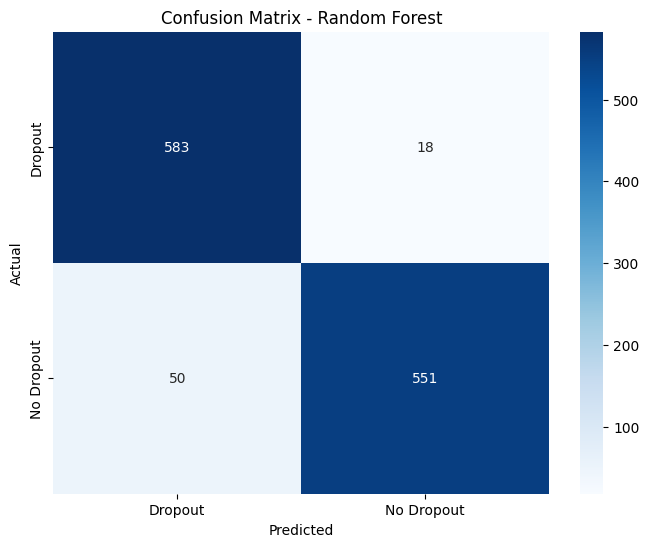

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'No Dropout'],
            yticklabels=['Dropout', 'No Dropout'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

**Confusion Matrix**:

- **True Positive (`Dropout terprediksi Dropout`)**: 583
- **False Negative (`Dropout terprediksi No Dropout`)**: 18
- **False Positive (`No Dropout terprediksi Dropout`)**: 50
- **True Negative (`No Dropout terprediksi No Dropout`)**: 551

&nbsp;

**Kesimpulan**:
- Model sangat baik dalam mengenali mahasiswa dropout (Recall tinggi untuk kelas Dropout).
- Jumlah kesalahan prediksi relatif kecil, sehingga model ini tergolong akurat dan seimbang.

In [ ]:
import_feature = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

rank = import_feature.head(50)
print(rank)

                                              Feature  Importance
4                   Curricular_units_2nd_sem_approved    0.211494
5                      Curricular_units_2nd_sem_grade    0.154780
2                   Curricular_units_1st_sem_approved    0.131837
3                      Curricular_units_1st_sem_grade    0.112515
0                                   Age_at_enrollment    0.082271
7                             Tuition_fees_up_to_date    0.048888
1                                  Scholarship_holder    0.025265
6                                              Debtor    0.025207
41                                        Gender_Male    0.023168
26             Course_Animation and Multimedia Design    0.013995
10    Application_mode_2nd Phase - General Contingent    0.013935
21                 Application_mode_Over 23 Years Old    0.012039
27                             Course_Basic Education    0.009911
33                                  Course_Management    0.008801
35        

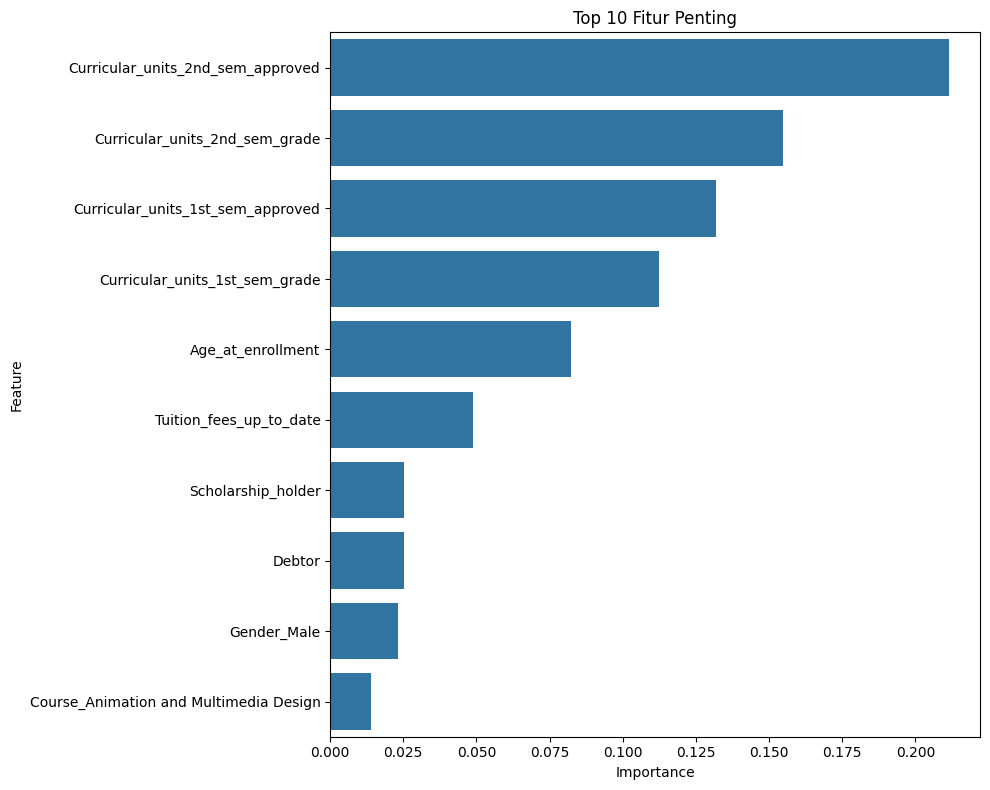

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=import_feature.head(10))
plt.title('Top 10 Fitur Penting')
plt.tight_layout()
plt.show()

**Top 10 Fitur Penting**:

- `Curricular_units_2nd_sem_approved` (**0.211**) — Jumlah mata kuliah semester 2 yang disetujui menjadi fitur paling penting dalam prediksi.
- `Curricular_units_2nd_sem_grade` (**0.155**) — Nilai rata-rata pada semester 2 menunjukkan pengaruh besar terhadap kelulusan.
- `Curricular_units_1st_sem_approved` (**0.132**) — Jumlah mata kuliah semester 1 yang disetujui juga menjadi indikator penting.
- `Curricular_units_1st_sem_grade` (**0.113**) — Nilai rata-rata semester 1 menggambarkan performa awal mahasiswa.
- `Age_at_enrollment` (**0.082**) — Usia saat mendaftar turut berperan dalam menentukan kemungkinan kelulusan atau dropout.
- `Tuition_fees_up_to_date` (**0.049**) — Status pembayaran uang kuliah yang tertib atau tidak menjadi sinyal finansial yang relevan.
- `Scholarship_holder` (**0.025**) — Mahasiswa penerima beasiswa cenderung menunjukkan performa berbeda.
- `Debtor` (**0.025**) — Status sebagai penunggak keuangan memiliki pengaruh terhadap keberhasilan studi.
- `Gender_Male` (**0.023**) — Jenis kelamin laki-laki berkontribusi kecil namun tetap signifikan.
- `Course_Animation and Multimedia Design` (**0.014**) — Program studi juga memengaruhi prediksi kelulusan, khususnya jurusan ini.

Fitur akademik (nilai dan jumlah mata kuliah yang disetujui) menjadi penentu utama, sedangkan faktor keuangan dan demografis memberikan pengaruh tambahan. Program studi juga menunjukkan adanya hubungan terhadap performa mahasiswa.


## **Saved & Testing Model**

In [ ]:
import_feature.to_csv('feature.csv', index=False)

In [ ]:
joblib.dump(rf, 'model.pkl')

['model.pkl']

In [ ]:
joblib.dump(oh_encoder, 'encoder.pkl')

['encoder.pkl']

In [ ]:
!pip freeze > requirements.txt

In [24]:
pred_df = features_df

In [25]:
pred_df.head(5)

,Application_mode,Course,Gender,Previous_qualification,Age_at_enrollment,Scholarship_holder,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Debtor,Tuition_fees_up_to_date,Status_pred
0,2nd Phase - General Contingent,Animation and Multimedia Design,Male,Secondary Education - 12th Year of Schooling o...,20,0,0,0.000000,0,0.000000,0,1,0
1,International Student (Bachelor),Tourism,Male,Secondary Education - 12th Year of Schooling o...,19,0,6,14.000000,6,13.666667,0,0,1
2,1st Phase - General Contingent,Communication Design,Male,Secondary Education - 12th Year of Schooling o...,19,0,0,0.000000,0,0.000000,0,0,0
3,2nd Phase - General Contingent,Journalism and Communication,Female,Secondary Education - 12th Year of Schooling o...,20,0,6,13.428571,5,12.400000,0,1,1
4,Over 23 Years Old,Social Service (Evening Attendance),Female,Secondary Education - 12th Year of Schooling o...,45,0,5,12.333333,6,13.000000,0,1,1


In [28]:
import joblib
import random
import pickle
import pandas as pd

def encode(df, encoder, import_cat, import_num):
    X_cat = encoder.transform(df[import_cat])
    cat_cols = encoder.get_feature_names_out(import_cat)

    X_num = df[import_num].reset_index(drop=True)

    X_ready = pd.concat([X_num, pd.DataFrame(X_cat, columns=cat_cols, index=X_num.index)], axis=1)
    return X_ready

def pred_and_save():
    with open("model.pkl", "rb") as file:
        model = joblib.load(file)

    encoder = joblib.load("encoder.pkl")

    df = pred_df

    if "Status_pred" in df.columns:
        actual_status = df["Status_pred"].copy()
        df = df.drop(columns=["Status_pred"])
    else:
        actual_status = None

    import_cat = ['Application_mode', 'Course', 'Gender', 'Previous_qualification']
    import_num = ['Age_at_enrollment', 'Scholarship_holder',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                  'Debtor', 'Tuition_fees_up_to_date']

    X_ready = encode(df, encoder, import_cat, import_num)

    prediction = model.predict(X_ready)
    proba = model.predict_proba(X_ready)

    random_indices = random.sample(range(len(df)), 3)

    for idx in random_indices:
        print("=" * 100)
        print(f"Hasil Prediksi untuk Baris ke-{idx + 1}:\n")
        print(df.iloc[idx])
        print()

        if prediction[idx] == 0:
            print(f"Prediksi: Mahasiswa akan keluar (Status = 0)")
            print(f"Probabilitas keluar: {proba[idx][0]:.2%}")
        else:
            print(f"Prediksi: Mahasiswa tidak akan keluar (Status = 1)")
            print(f"Probabilitas bertahan: {proba[idx][1]:.2%}")

    df["Status (Actual)"] = actual_status if actual_status is not None else "-"
    df["PredictedStatus"] = prediction
    df["Probability"] = [round(p[0], 4) for p in proba]

    df.to_csv("pred.csv", index=False)

if __name__ == "__main__":
    pred_and_save()

Hasil Prediksi untuk Baris ke-1056:

Application_mode                                        1st Phase - General Contingent
Course                                                                         Nursing
Gender                                                                          Female
Previous_qualification               Secondary Education - 12th Year of Schooling o...
Age_at_enrollment                                                                   19
Scholarship_holder                                                                   1
Curricular_units_1st_sem_approved                                                    7
Curricular_units_1st_sem_grade                                                    13.7
Curricular_units_2nd_sem_approved                                                    7
Curricular_units_2nd_sem_grade                                               14.671429
Debtor                                                                               0
Tuitio